# WORK WITH DATA - DATA QUALITY CASE STUDY

## Importing the libraries


In [159]:
import pandas as pd
import numpy  as np
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud
from nltk.probability import FreqDist
import missingno as msno
import scipy.stats as st
from sklearn.impute import SimpleImputer
import regex as re

pd.set_option("display.max_rows", 20)



## 1) DATA PREPARATION / PRE-PROCESSING / CLEANING

In [160]:
df = pd.read_excel(r'C:\Users\patie\OneDrive\Desktop\DATA SCIENCE with Jude\GitHub Page\Artwork.xlsx')



In [161]:
df

,artwork_id,artwork,medium,credit,classification,acquisition_date,depth,height,width,artwork_link,start_date,end_date,date_text,museum,artists
0,133799,Nächtliche Fusel from Radierung 1932,One from a portfolio of nine etchings with aqu...,Gift of Mr. Heinz Schultz,Print,21102.0,NaN,NaN,NaN,NaN,1949.0,1949,1949,Museum of Modern Art (New York),Eugen Batz
1,69574,The Three Orders (Les Trois ordres),Etching,Larry Aldrich Fund,Print,19997.0,NaN,28.3,18.7,http://www.moma.org/media/W1siZiIsIjE3NzgyOSJd...,1939.0,1939,1939,Museum of Modern Art (New York),Jacques Villon
2,13629,"THE ANT (double page plate, between pages 28 a...","Lithograph, printed in black",Monroe Wheeler Fund,Illustrated Book,23838.0,NaN,48.9,64.9,NaN,1964.0,1964,1964,Museum of Modern Art (New York),Rudy Pozzatti
3,71888,Untitled,"Drypoint, with hand additions",Gift of the artist,Print,35381.0,NaN,18.4,14,http://www.moma.org/media/W1siZiIsIjI2ODA2MSJd...,1993.0,1993,1993,Museum of Modern Art (New York),Louise Bourgeois
4,34038,Untitled,Pencil on paper,Gift of Ladislaus Szecsi,Drawing,13501.0,NaN,34.3,22.225,http://www.moma.org/media/W1siZiIsIjQ3OTM0MiJd...,1901.0,1901,1901,Museum of Modern Art (New York),Auguste Merle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210130,95,Programme For An Artistic Soiree,Drawing,NaN,NaN,39993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stolen art (Interpol),Edgar Degas
210131,96,Three Jockeys On Horseback,Drawing,NaN,NaN,39993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stolen art (Interpol),Edgar Degas
210132,97,Cortege Near Florence,Painting,NaN,NaN,39993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stolen art (Interpol),Edgar Degas
210133,98,Leaving The Weigh-In,Painting,NaN,NaN,39993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stolen art (Interpol),Edgar Degas


# First visual check using filters in Excel:



#### Artwork > There are a few dates and numbers midex up with the text. The dates could be the name of the artworks, so I will just capitalize the first letter of the title and make sure the titles are in bigger caps are homogenious as lower cap. 

#### Medium > All values should start with a capital letter.     

#### Credit > All values will start with a capital letter, to create more omogenity. This column will show only strings, so other charachters like numbers will be stripped off.

#### Classification > there are a few dates, mixed up with text. Will need to eliminate anything that is not a classification type (numbers for example) as they do not match this column aim. And also, all values should start with a capital letter and special characters (.()*”’- non including accents or umlaut) should be removed, to create more omogenity.  

#### Width, Height, Depth > There are a few cells containing websites, which will been to be cleared. I will move them to column 'Artwork Link'. Will assure the column only consists of numbers.

#### Artwork Link > There are a few dates in the colomun, which will need to be cleaned. Anything not starting with http will be removed.

#### Start Date; End Date, Acquisition Date    > Some textual data mixed up with dates. Line 9351 seems to mention the Museum (MOMA) instead of the end date, the musuem cel for the line is empty. So this info can be put in the correct column.

#### date_text >  This column seems to contain sames values as in end_date. Any empty cell in end_date, will take the value from this column, then it will be deleted.

#### Museum > The information in this column, is sourced from three different museums: the Museum of Modern Art (New York), the Tate Museums (London) and the Rijks museum (Amsterdam), however, some of the fields are not actually museums but artists names. It seems like the cells info was shifted to the left. So I will look into placing the data in the correct column.

### Artists > Will make sure first letter is capitalized and type is string. 

### All Columns titles will be adjusted as here; (date_text) will be deleted.



In [162]:
# Checking the dataset column types

print(df.dtypes)

# All the column types need to be fixed

artwork_id           object
artwork              object
medium               object
credit               object
classification       object
acquisition_date    float64
depth               float64
height              float64
width                object
artwork_link         object
start_date          float64
end_date             object
date_text            object
museum               object
artists              object
dtype: object


In [163]:
# Checking how many non null items we have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210135 entries, 0 to 210134
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artwork_id        210133 non-null  object 
 1   artwork           210092 non-null  object 
 2   medium            161041 non-null  object 
 3   credit            143187 non-null  object 
 4   classification    209007 non-null  object 
 5   acquisition_date  161057 non-null  float64
 6   depth             12437 non-null   float64
 7   height            181499 non-null  float64
 8   width             178327 non-null  object 
 9   artwork_link      101618 non-null  object 
 10  start_date        179433 non-null  float64
 11  end_date          179106 non-null  object 
 12  date_text         208187 non-null  object 
 13  museum            210090 non-null  object 
 14  artists           169774 non-null  object 
dtypes: float64(4), object(11)
memory usage: 24.0+ MB


In [164]:
# There are quite a lot of missing values/empty cells, the below checks if there are missing values in each of the columns?

pd.isna(df)

# Yes: all columns have missing values

,artwork_id,artwork,medium,credit,classification,acquisition_date,depth,height,width,artwork_link,start_date,end_date,date_text,museum,artists
0,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210130,False,False,False,True,True,False,True,True,True,True,True,True,True,False,False
210131,False,False,False,True,True,False,True,True,True,True,True,True,True,False,False
210132,False,False,False,True,True,False,True,True,True,True,True,True,True,False,False
210133,False,False,False,True,True,False,True,True,True,True,True,True,True,False,False


In [165]:
# Counting the empty cells per column:

# Checking the Non null values

df.isna().sum().sort_values(ascending = False)

depth               197698
artwork_link        108517
credit               66948
medium               49094
acquisition_date     49078
artists              40361
width                31808
end_date             31029
start_date           30702
height               28636
date_text             1948
classification        1128
museum                  45
artwork                 43
artwork_id               2
dtype: int64

<Axes: >

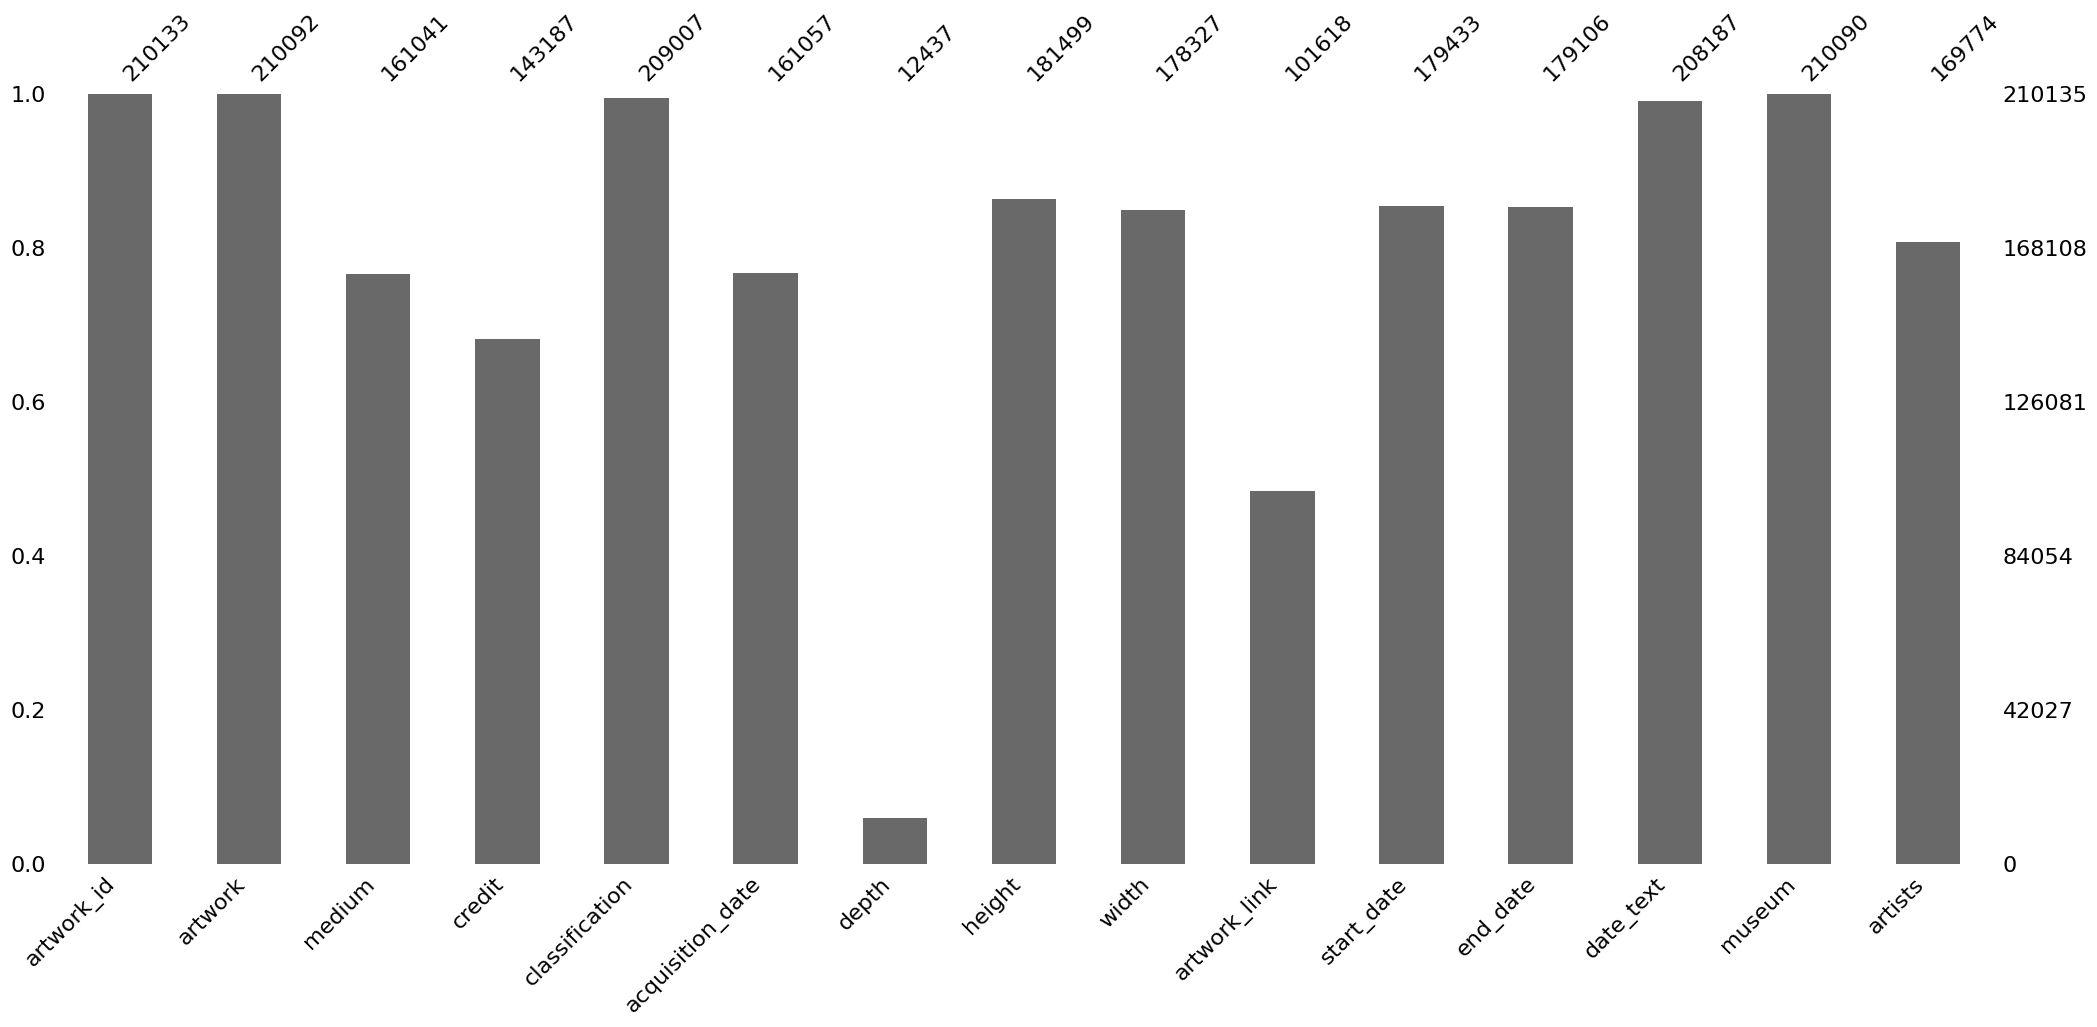

In [166]:
# Visualizing each column with the missing info

msno.bar(df)

<Axes: >

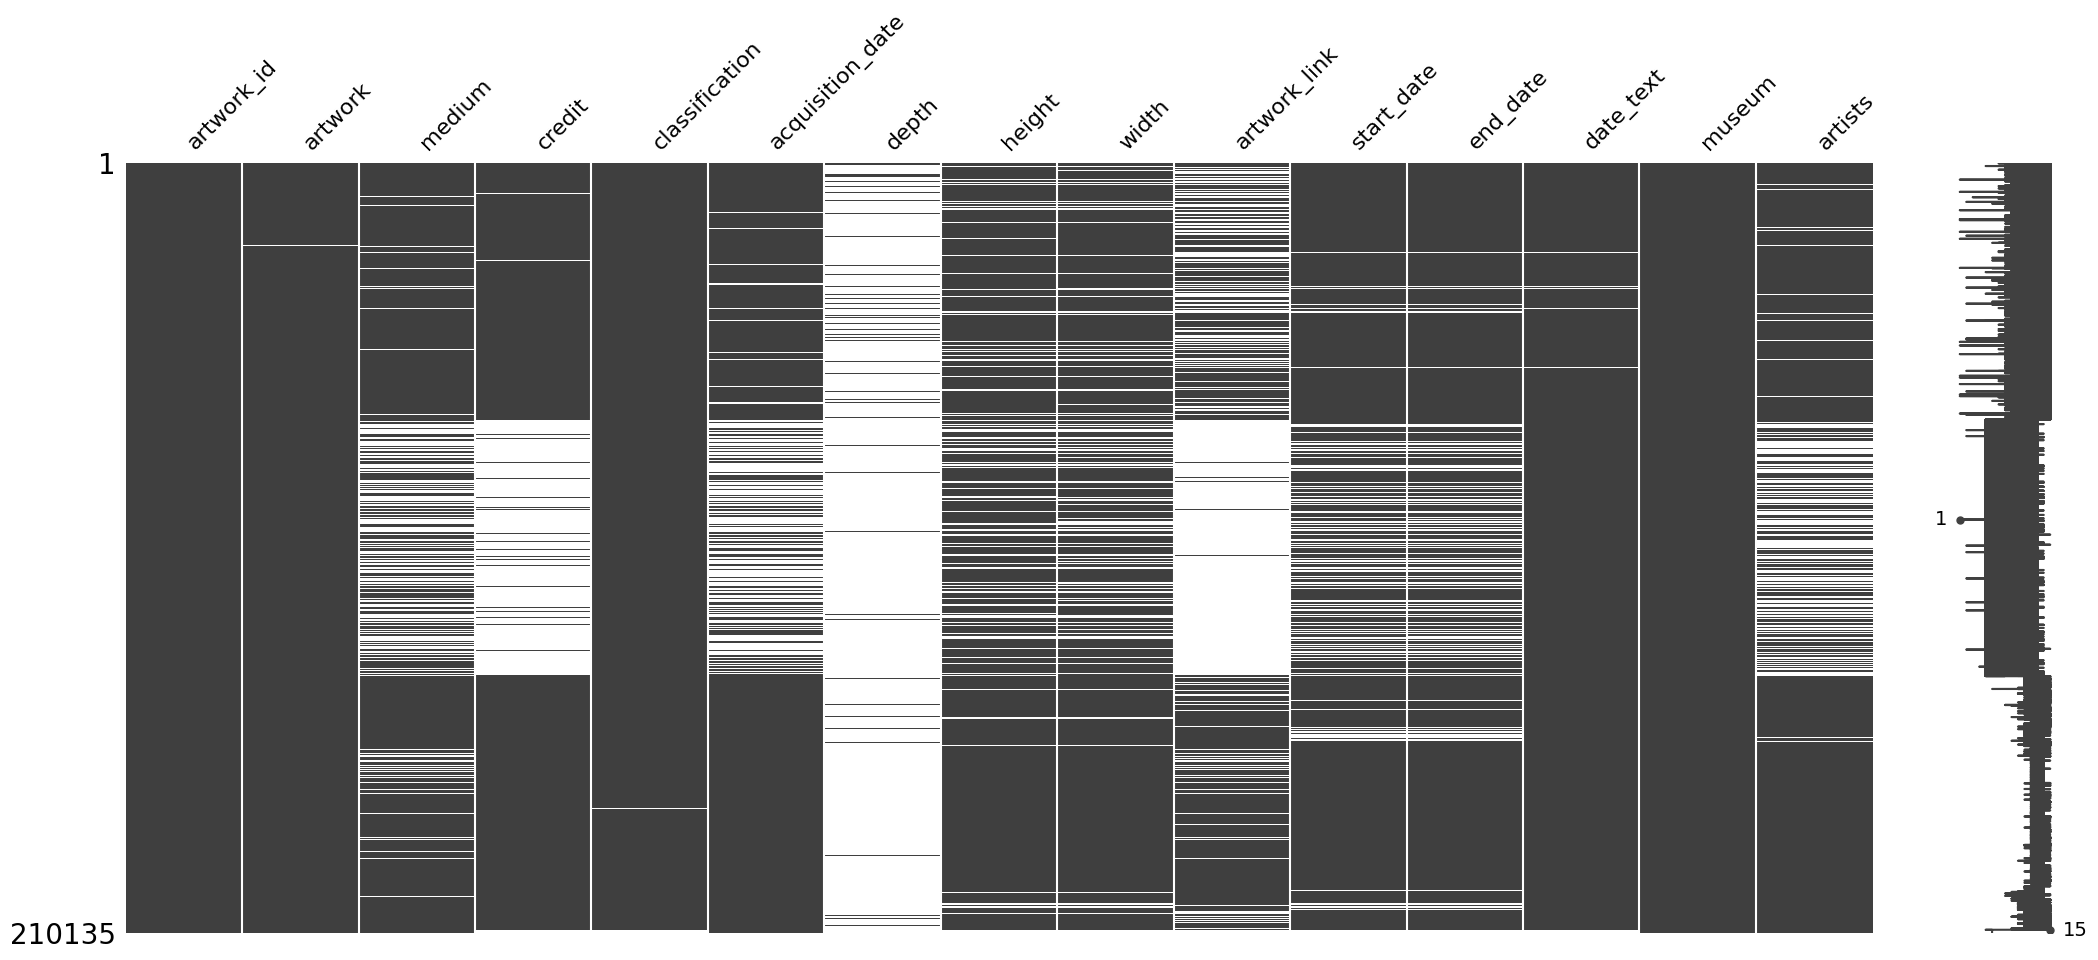

In [167]:
# Visualizing where most of the missing data is distributed, to check if there is any pattern.

msno.matrix(df)

<Axes: >

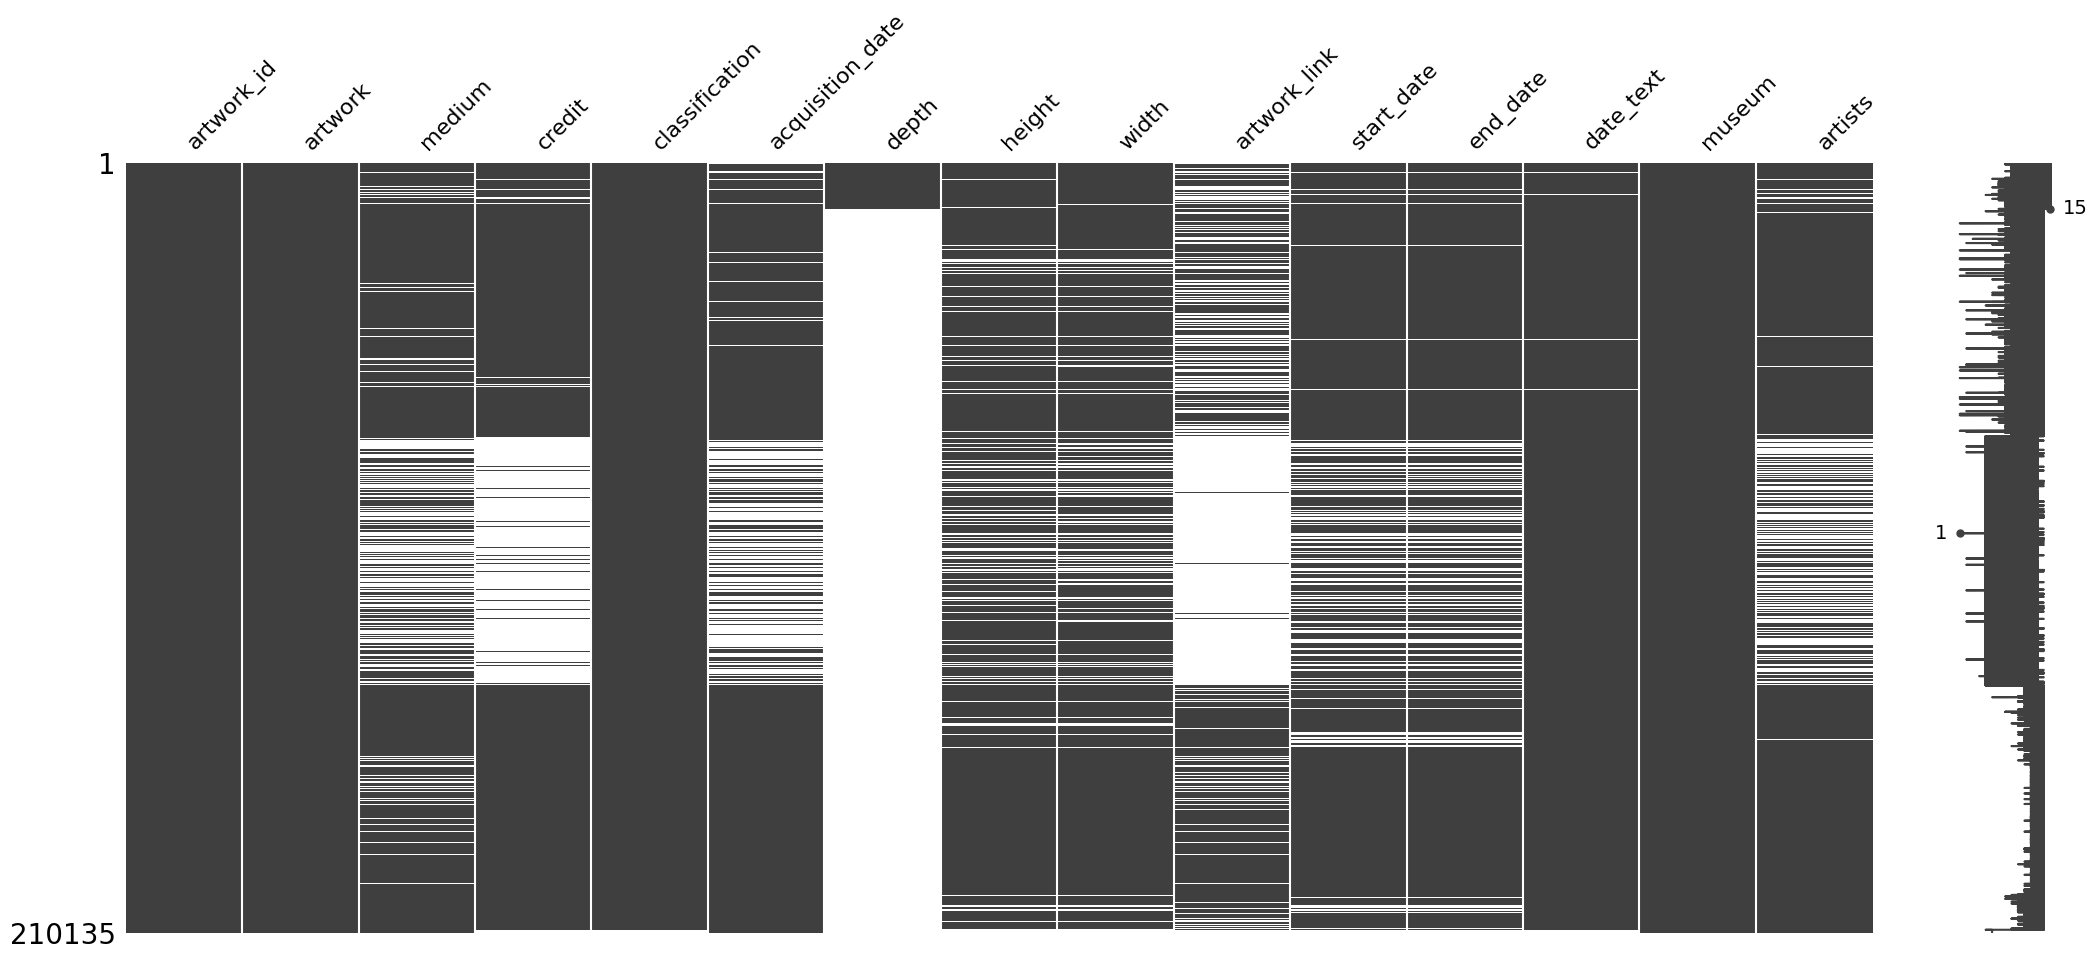

In [168]:
sorted_values = df.sort_values('depth')

msno.matrix(sorted_values)

In [169]:
# Starting the Cleaning process

# Artwork > There are a few dates and numbers midex up with the text. 
# The dates could be the name of the artworks, so I will just capitalize the first letter of the titles and make sure the titles in bigger caps (ex. line 1191) are homogenious as lower cap. 

# If the string is ALL UPPERCASE, convert it to lowercase and setting type as string
def fix_caps(text):
    if isinstance(text, str) and text.isupper():
        return text.lower()
    return text

df['artwork'] = df['artwork'].apply(fix_caps).astype('str')

# Capitalize first letter
df['artwork'] = df['artwork'].apply(lambda x: x.capitalize() if isinstance(x, str) else x)

# Add " at start and end, skip NaN
df['artwork'] = df['artwork'].apply(lambda x: f'"{x}"' if isinstance(x, str) else x)




In [170]:
# Checking
df['artwork'] 

0                    "Nächtliche fusel from radierung 1932"
1                     "The three orders (les trois ordres)"
2         "The ant (double page plate, between pages 28 ...
3                                                "Untitled"
4                                                "Untitled"
                                ...                        
210130                   "Programme for an artistic soiree"
210131                         "Three jockeys on horseback"
210132                              "Cortege near florence"
210133                               "Leaving the weigh-in"
210134                          "Dancer adjusting her shoe"
Name: artwork, Length: 210135, dtype: object

In [171]:
# Medium > All values should start with a capital letter, setting also type string

df['medium'] = df['medium'].apply(lambda x: x.capitalize() if isinstance(x, str) else x).astype('str')


In [172]:
# Checking

df['medium']

0         One from a portfolio of nine etchings with aqu...
1                                                   Etching
2                              Lithograph, printed in black
3                             Drypoint, with hand additions
4                                           Pencil on paper
                                ...                        
210130                                              Drawing
210131                                              Drawing
210132                                             Painting
210133                                             Painting
210134                                              Drawing
Name: medium, Length: 210135, dtype: object

In [173]:
# Credit > All values will start with a capital letter, to create more omogenity. 
# This column will show only strings, so other charachters like numbers will be stripped off. Also setting type string.

df['credit'].replace({r'\b[A-Z]+\d+\b': np.nan, 'nan': np.nan}, regex=True).astype('str')

# Capitalize first letter
df['credit'] = df['credit'].apply(lambda x: x.capitalize() if isinstance(x, str) else x)


In [174]:
# Checking
df['credit'] 

0         Gift of mr. heinz schultz
1                Larry aldrich fund
2               Monroe wheeler fund
3                Gift of the artist
4          Gift of ladislaus szecsi
                    ...            
210130                          NaN
210131                          NaN
210132                          NaN
210133                          NaN
210134                          NaN
Name: credit, Length: 210135, dtype: object

In [175]:
# Classification > there are a few dates, mixed up with text. Will need to eliminate anything that is not a classification type (numbers for example) 
# as they do not match this column aim. And also, all values should start with a capital letter and special characters (.()*”’- non including accents or umlaut) should be removed, to create more omogenity.  

# Will need to eliminate the dates

df['classification'].replace({r'\b[A-Z]+\d+\b': np.nan, 'nan': np.nan}, regex=True)

# Capitalize first letter
df['classification'] = df['classification'].apply(lambda x: x.capitalize() if isinstance(x, str) else x).astype('str')


In [176]:
# Checking
df['classification']

0                    Print
1                    Print
2         Illustrated book
3                    Print
4                  Drawing
                ...       
210130                 nan
210131                 nan
210132                 nan
210133                 nan
210134                 nan
Name: classification, Length: 210135, dtype: object

In [177]:
# Width > There are a few cells containing websites, which will been to be cleared. 
# I will move them to column 'Artwork Link'. Will assure the column only consists of numbers.

# Define is_url function first
def is_url(text):
    if isinstance(text, str):
        return bool(re.search(r'https?://|www\.', text))
    return False

# Move links accidentally placed in width, into artwork_link
df['artwork_link'] = df.apply(
    lambda row: row['width'] if is_url(row['width']) else row['artwork_link'],
    axis=1)

# Keep only numbers in 'Width' (remove any other text or URLs)
df['width'] = df['width'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)) if pd.notna(x) else x)

# Convert to numeric, force errors to NaN (cleans empty strings)
df['width'] = pd.to_numeric(df['width'], errors='coerce')


In [178]:
# Checking and rounding decimals to 2
df['width'].round(2)

0           NaN
1         18.70
2         64.90
3         14.00
4         22.22
          ...  
210130      NaN
210131      NaN
210132      NaN
210133      NaN
210134      NaN
Name: width, Length: 210135, dtype: float64

In [179]:
# Similar process for depth and height Columns

# Keep only numbers in 'Width' (remove any other text or URLs)
df['depth'] = df['depth'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)) if pd.notna(x) else x)
df['height'] = df['height'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)) if pd.notna(x) else x)

# Convert to numeric, force errors to NaN (cleans empty strings)
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Checking and rounding decimals to 2
df['depth'].round(2)
df['height'].round(2)




0          NaN
1         28.3
2         48.9
3         18.4
4         34.3
          ... 
210130     NaN
210131     NaN
210132     NaN
210133     NaN
210134     NaN
Name: height, Length: 210135, dtype: float64

In [180]:
# Checking
print(df['depth'].notna().sum())
print(df['height'].notna().sum())

12437
181499


In [181]:

# Artwork Link > There are a few dates in the colomun, which will need to be cleaned. 
# Anything not starting with http will be removed.

# First, stripping spaces and lower-case first:

df['artwork_link'] = df['artwork_link'].apply(
    lambda x: x if isinstance(x, str) and re.search(r'\.\w{2,3}', x) else np.nan)

# Apply function







In [182]:
# Checking
df['artwork_link']

0                                                       NaN
1         http://www.moma.org/media/W1siZiIsIjE3NzgyOSJd...
2                                                       NaN
3         http://www.moma.org/media/W1siZiIsIjI2ODA2MSJd...
4         http://www.moma.org/media/W1siZiIsIjQ3OTM0MiJd...
                                ...                        
210130                                                  NaN
210131                                                  NaN
210132                                                  NaN
210133                                                  NaN
210134                                                  NaN
Name: artwork_link, Length: 210135, dtype: object

In [183]:
# Checking how many Nan cells are left
print(df['artwork_link'].notna().sum())


101608


In [184]:
# Start Date; end_date > Some textual data mixed up with dates. Line 9351 seems to mention the Museum (MOMA) instead of the end date, 
# the musuem cel for the line is empty. So this info can be put in the correct column.

# start_date > convert to date tieme format yyyy-mm-dd using coerce to change anything else that is not a number (there were a few textual cells) to nan
# If ‘coerce’, then invalid parsing will be set as NaN. Coercing means loosing data.


df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce').dt.date
df['start_date']

# Same for end_date

df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce').dt.date
df['end_date']




0         1970-01-01
1         1970-01-01
2         1970-01-01
3         1970-01-01
4         1970-01-01
             ...    
210130           NaT
210131           NaT
210132           NaT
210133           NaT
210134           NaT
Name: end_date, Length: 210135, dtype: object

In [185]:
# Checking
df['start_date']

0         1970-01-01
1         1970-01-01
2         1970-01-01
3         1970-01-01
4         1970-01-01
             ...    
210130           NaT
210131           NaT
210132           NaT
210133           NaT
210134           NaT
Name: start_date, Length: 210135, dtype: object

In [186]:
# Checking
df['end_date']

0         1970-01-01
1         1970-01-01
2         1970-01-01
3         1970-01-01
4         1970-01-01
             ...    
210130           NaT
210131           NaT
210132           NaT
210133           NaT
210134           NaT
Name: end_date, Length: 210135, dtype: object

In [187]:
# date_text >  This column seems to contain sames values as in end_date. 
# Any empty cell in end_date, will take the value from this column, then the column will be deleted.

# If end_date is missing (NaT or NaN), fill it with date_text
df['end_date'] = df['end_date'].fillna(df['date_text'])

# Also, convert the format to datetime if needed
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Now drop the 'date_text' column
df = df.drop(columns=['date_text'])




In [188]:
# Checking

df

,artwork_id,artwork,medium,credit,classification,acquisition_date,depth,height,width,artwork_link,start_date,end_date,museum,artists
0,133799,"""Nächtliche fusel from radierung 1932""",One from a portfolio of nine etchings with aqu...,Gift of mr. heinz schultz,Print,21102.0,NaN,NaN,NaN,NaN,1970-01-01,1970-01-01,Museum of Modern Art (New York),Eugen Batz
1,69574,"""The three orders (les trois ordres)""",Etching,Larry aldrich fund,Print,19997.0,NaN,28.3,18.700,http://www.moma.org/media/W1siZiIsIjE3NzgyOSJd...,1970-01-01,1970-01-01,Museum of Modern Art (New York),Jacques Villon
2,13629,"""The ant (double page plate, between pages 28 ...","Lithograph, printed in black",Monroe wheeler fund,Illustrated book,23838.0,NaN,48.9,64.900,NaN,1970-01-01,1970-01-01,Museum of Modern Art (New York),Rudy Pozzatti
3,71888,"""Untitled""","Drypoint, with hand additions",Gift of the artist,Print,35381.0,NaN,18.4,14.000,http://www.moma.org/media/W1siZiIsIjI2ODA2MSJd...,1970-01-01,1970-01-01,Museum of Modern Art (New York),Louise Bourgeois
4,34038,"""Untitled""",Pencil on paper,Gift of ladislaus szecsi,Drawing,13501.0,NaN,34.3,22.225,http://www.moma.org/media/W1siZiIsIjQ3OTM0MiJd...,1970-01-01,1970-01-01,Museum of Modern Art (New York),Auguste Merle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210130,95,"""Programme for an artistic soiree""",Drawing,NaN,nan,39993.0,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar Degas
210131,96,"""Three jockeys on horseback""",Drawing,NaN,nan,39993.0,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar Degas
210132,97,"""Cortege near florence""",Painting,NaN,nan,39993.0,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar Degas
210133,98,"""Leaving the weigh-in""",Painting,NaN,nan,39993.0,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar Degas


In [189]:
# Similarly for acquisition_date     

df['acquisition_date'] = pd.to_datetime(df['acquisition_date'], errors='coerce').dt.date
df['acquisition_date']

0         1970-01-01
1         1970-01-01
2         1970-01-01
3         1970-01-01
4         1970-01-01
             ...    
210130    1970-01-01
210131    1970-01-01
210132    1970-01-01
210133    1970-01-01
210134    1970-01-01
Name: acquisition_date, Length: 210135, dtype: object

In [190]:
# Museum > The information in this column, is sourced from three different museums: the Museum of Modern Art (New York), the Tate Museums (London) and the Rijks museum (Amsterdam) - (some also were stolen Art), however, some of the fields are not actually museums but artists names. 
# It seems like the cells info was shifted to the left. So I will look into placing the data in the correct column.


valid_museums = ['Museum of Modern Art (New York)', 'Tate Museums', 'Rijks', 'Stolen art (Interpol)']

# Check if any of the museum names are *contained* within the string
df['is_artist_name_instead'] = ~df['museum'].apply(lambda x: any(museum in x for museum in valid_museums) if isinstance(x, str) else False)






In [191]:
# Checking
df['museum'] 

0         Museum of Modern Art (New York)
1         Museum of Modern Art (New York)
2         Museum of Modern Art (New York)
3         Museum of Modern Art (New York)
4         Museum of Modern Art (New York)
                       ...               
210130              Stolen art (Interpol)
210131              Stolen art (Interpol)
210132              Stolen art (Interpol)
210133              Stolen art (Interpol)
210134              Stolen art (Interpol)
Name: museum, Length: 210135, dtype: object

In [192]:
# Checking
df['is_artist_name_instead']

0         False
1         False
2         False
3         False
4         False
          ...  
210130    False
210131    False
210132    False
210133    False
210134    False
Name: is_artist_name_instead, Length: 210135, dtype: bool

In [193]:
# Mark rows where 'museum' is not one of the valid museums
df['is_artist_name_instead'] = ~df['museum'].isin(valid_museums)



In [194]:
# Where the museum is not valid, move it to 'artists' (if artists is empty)
df.loc[df['is_artist_name_instead'] & df['artists'].isna(), 'artists'] = df['museum']



In [195]:
# Checking
df['museum']

0         Museum of Modern Art (New York)
1         Museum of Modern Art (New York)
2         Museum of Modern Art (New York)
3         Museum of Modern Art (New York)
4         Museum of Modern Art (New York)
                       ...               
210130              Stolen art (Interpol)
210131              Stolen art (Interpol)
210132              Stolen art (Interpol)
210133              Stolen art (Interpol)
210134              Stolen art (Interpol)
Name: museum, Length: 210135, dtype: object

In [196]:
# Set Museum to NaN where it contained an artist name
df.loc[df['is_artist_name_instead'], 'museum'] = np.nan

In [197]:
# Checking
df['museum']

0         Museum of Modern Art (New York)
1         Museum of Modern Art (New York)
2         Museum of Modern Art (New York)
3         Museum of Modern Art (New York)
4         Museum of Modern Art (New York)
                       ...               
210130              Stolen art (Interpol)
210131              Stolen art (Interpol)
210132              Stolen art (Interpol)
210133              Stolen art (Interpol)
210134              Stolen art (Interpol)
Name: museum, Length: 210135, dtype: object

In [198]:
# Checking how many empty cells are now there
df['museum'].isna().sum()


np.int64(62)

In [199]:
# Artists > Will make sure first letter is capitalized and type is string. 

# Capitalize first letter
df['artists'] = df['artists'].apply(lambda x: x.capitalize() if isinstance(x, str) else x)

# Fixing type
df['artwork'].astype('str') 



0                    "Nächtliche fusel from radierung 1932"
1                     "The three orders (les trois ordres)"
2         "The ant (double page plate, between pages 28 ...
3                                                "Untitled"
4                                                "Untitled"
                                ...                        
210130                   "Programme for an artistic soiree"
210131                         "Three jockeys on horseback"
210132                              "Cortege near florence"
210133                               "Leaving the weigh-in"
210134                          "Dancer adjusting her shoe"
Name: artwork, Length: 210135, dtype: object

In [200]:
# Checking the dataset column types

#print(df.dtypes)

# Most of the column types need to be fixed +  Renaming the Columns titles

df.rename(columns={
        'artwork_id': 'Artwork ID',
        'artwork': 'Artwork',
        'medium': 'Medium',
        'credit': 'Credit',
        'classification': 'Classification',
        'acquisition_date': 'Acquisition Date',
        'depth': 'Depth',
        'height': 'Height',
        'width': 'Width',
        'artwork_link': 'Artwork Link',
        'start_date': 'Start Date',
        'end_date': 'End Date',
        'museum': 'Museum',
        'artists': 'Artists'
    }, inplace=True)

df = (df.astype({
        'Artwork': 'string',
        'Medium': 'string',
        'Credit': 'string',
        'Classification': 'string',
        'Depth': 'float',
        'Height': 'float',
        'Width': 'float',
        'Museum': 'string',
        'Artists': 'string'
    })
    .assign(
        **{
        'Start Date': pd.to_datetime(df['Start Date'], errors='coerce'),
        'End Date': pd.to_datetime(df['End Date'], errors='coerce'),
        'Acquisition Date': pd.to_datetime(df['Acquisition Date'], errors='coerce'),
        })
)


# Coercing Arwork ID into int type

df['Artwork ID'] = pd.to_numeric(df['Artwork ID'], errors='coerce')  # Gives floats
df['Artwork ID'] = pd.Series(df['Artwork ID'], dtype='Int64')  # Explicitly nullable integer





In [201]:
# Dropping is_artist_name_instead       
df = df.drop(columns=['is_artist_name_instead'])

In [202]:
# Checking
df

,Artwork ID,Artwork,Medium,Credit,Classification,Acquisition Date,Depth,Height,Width,Artwork Link,Start Date,End Date,Museum,Artists
0,133799.0,"""Nächtliche fusel from radierung 1932""",One from a portfolio of nine etchings with aqu...,Gift of mr. heinz schultz,Print,1970-01-01,NaN,NaN,NaN,NaN,1970-01-01,1970-01-01,Museum of Modern Art (New York),Eugen batz
1,69574.0,"""The three orders (les trois ordres)""",Etching,Larry aldrich fund,Print,1970-01-01,NaN,28.3,18.700,http://www.moma.org/media/W1siZiIsIjE3NzgyOSJd...,1970-01-01,1970-01-01,Museum of Modern Art (New York),Jacques villon
2,13629.0,"""The ant (double page plate, between pages 28 ...","Lithograph, printed in black",Monroe wheeler fund,Illustrated book,1970-01-01,NaN,48.9,64.900,NaN,1970-01-01,1970-01-01,Museum of Modern Art (New York),Rudy pozzatti
3,71888.0,"""Untitled""","Drypoint, with hand additions",Gift of the artist,Print,1970-01-01,NaN,18.4,14.000,http://www.moma.org/media/W1siZiIsIjI2ODA2MSJd...,1970-01-01,1970-01-01,Museum of Modern Art (New York),Louise bourgeois
4,34038.0,"""Untitled""",Pencil on paper,Gift of ladislaus szecsi,Drawing,1970-01-01,NaN,34.3,22.225,http://www.moma.org/media/W1siZiIsIjQ3OTM0MiJd...,1970-01-01,1970-01-01,Museum of Modern Art (New York),Auguste merle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210130,95.0,"""Programme for an artistic soiree""",Drawing,<NA>,nan,1970-01-01,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar degas
210131,96.0,"""Three jockeys on horseback""",Drawing,<NA>,nan,1970-01-01,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar degas
210132,97.0,"""Cortege near florence""",Painting,<NA>,nan,1970-01-01,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar degas
210133,98.0,"""Leaving the weigh-in""",Painting,<NA>,nan,1970-01-01,NaN,NaN,NaN,NaN,NaT,NaT,Stolen art (Interpol),Edgar degas


In [203]:
# Checking
print(df.dtypes)

Artwork ID                 float64
Artwork             string[python]
Medium              string[python]
Credit              string[python]
Classification      string[python]
Acquisition Date    datetime64[ns]
Depth                      float64
Height                     float64
Width                      float64
Artwork Link                object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Museum              string[python]
Artists             string[python]
dtype: object


C:\Users\patie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\patie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


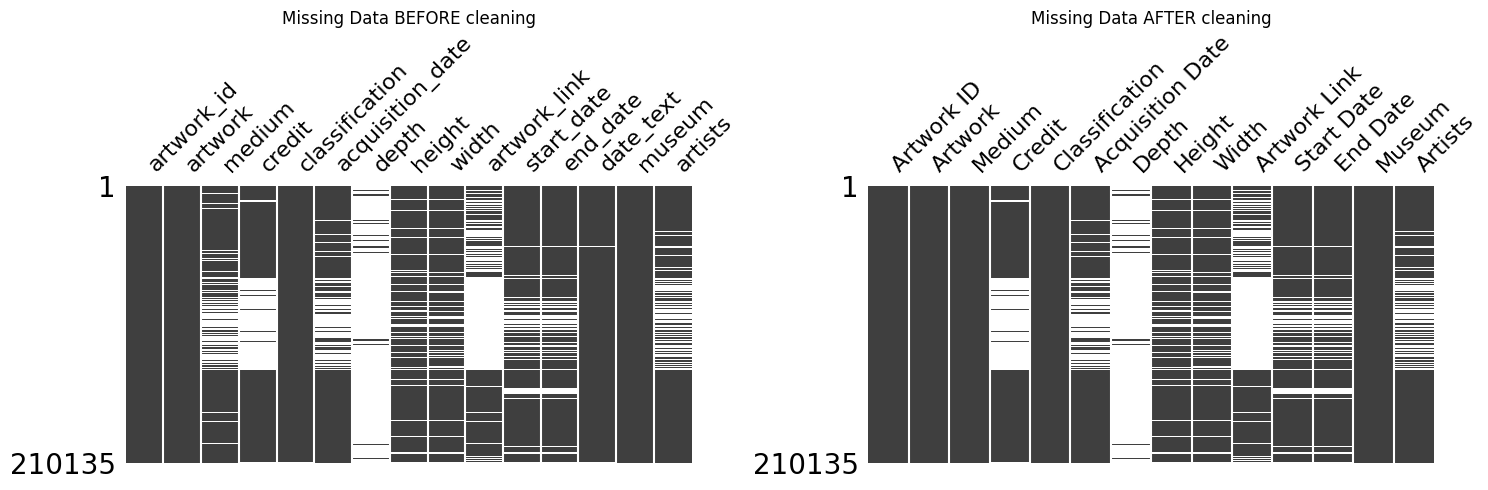

In [204]:
# Comparing empty cells before vs after with msno.matrix(df)

df_before = pd.read_excel(r'C:\Users\patie\OneDrive\Desktop\DATA SCIENCE with Jude\GitHub Page\Artwork.xlsx')

# Set up the visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 cols

# Visualize missing data BEFORE cleaning
msno.matrix(df_before, ax=axes[0])
axes[0].set_title("Missing Data BEFORE cleaning")

# AFTER cleaning
msno.matrix(df, ax=axes[1])
axes[1].set_title("Missing Data AFTER cleaning")

plt.tight_layout()
plt.show()




Not much more data has been lost.

In [205]:
# Filling in missing data with "Not Available" in the whole dataset.
df = df.fillna('Not Available')


<Axes: >

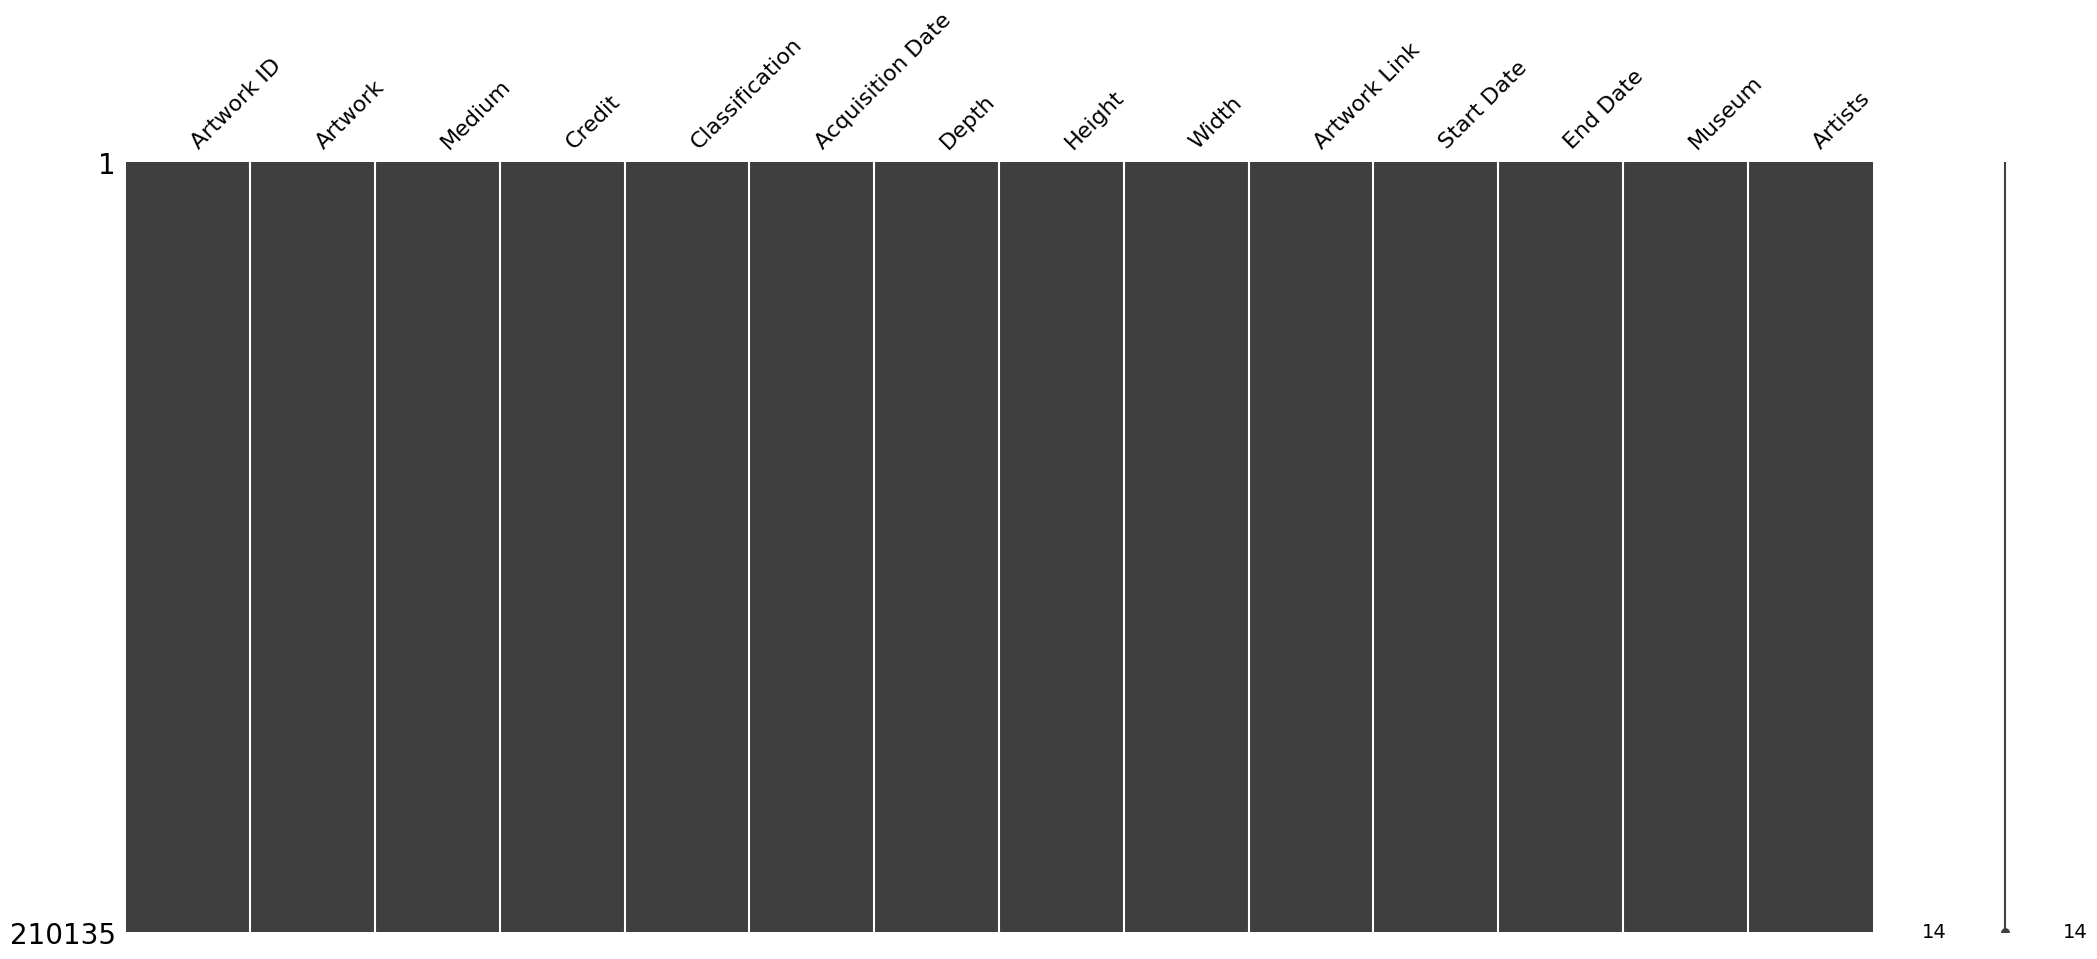

In [206]:
# Check
msno.matrix(df)

In [207]:
# Checking
df

,Artwork ID,Artwork,Medium,Credit,Classification,Acquisition Date,Depth,Height,Width,Artwork Link,Start Date,End Date,Museum,Artists
0,133799.0,"""Nächtliche fusel from radierung 1932""",One from a portfolio of nine etchings with aqu...,Gift of mr. heinz schultz,Print,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Eugen batz
1,69574.0,"""The three orders (les trois ordres)""",Etching,Larry aldrich fund,Print,1970-01-01 00:00:00,Not Available,28.3,18.7,http://www.moma.org/media/W1siZiIsIjE3NzgyOSJd...,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Jacques villon
2,13629.0,"""The ant (double page plate, between pages 28 ...","Lithograph, printed in black",Monroe wheeler fund,Illustrated book,1970-01-01 00:00:00,Not Available,48.9,64.9,Not Available,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Rudy pozzatti
3,71888.0,"""Untitled""","Drypoint, with hand additions",Gift of the artist,Print,1970-01-01 00:00:00,Not Available,18.4,14.0,http://www.moma.org/media/W1siZiIsIjI2ODA2MSJd...,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Louise bourgeois
4,34038.0,"""Untitled""",Pencil on paper,Gift of ladislaus szecsi,Drawing,1970-01-01 00:00:00,Not Available,34.3,22.225,http://www.moma.org/media/W1siZiIsIjQ3OTM0MiJd...,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Auguste merle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210130,95.0,"""Programme for an artistic soiree""",Drawing,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas
210131,96.0,"""Three jockeys on horseback""",Drawing,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas
210132,97.0,"""Cortege near florence""",Painting,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas
210133,98.0,"""Leaving the weigh-in""",Painting,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas


In [208]:
# Final dataset. I have decided to:

# delete columns: artwork id, depth: the first does not provide info, the second has a lot of missing values

df.drop(['Artwork ID', 'Depth'], axis=1)

# I also thought about removing some of those empty rows: maybe all rows without art work name and artwork link and artist and museum? As these are the essential info?
# Decided against it as I want to preserve as much data as possible.

,Artwork,Medium,Credit,Classification,Acquisition Date,Height,Width,Artwork Link,Start Date,End Date,Museum,Artists
0,"""Nächtliche fusel from radierung 1932""",One from a portfolio of nine etchings with aqu...,Gift of mr. heinz schultz,Print,1970-01-01 00:00:00,Not Available,Not Available,Not Available,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Eugen batz
1,"""The three orders (les trois ordres)""",Etching,Larry aldrich fund,Print,1970-01-01 00:00:00,28.3,18.7,http://www.moma.org/media/W1siZiIsIjE3NzgyOSJd...,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Jacques villon
2,"""The ant (double page plate, between pages 28 ...","Lithograph, printed in black",Monroe wheeler fund,Illustrated book,1970-01-01 00:00:00,48.9,64.9,Not Available,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Rudy pozzatti
3,"""Untitled""","Drypoint, with hand additions",Gift of the artist,Print,1970-01-01 00:00:00,18.4,14.0,http://www.moma.org/media/W1siZiIsIjI2ODA2MSJd...,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Louise bourgeois
4,"""Untitled""",Pencil on paper,Gift of ladislaus szecsi,Drawing,1970-01-01 00:00:00,34.3,22.225,http://www.moma.org/media/W1siZiIsIjQ3OTM0MiJd...,1970-01-01 00:00:00,1970-01-01 00:00:00,Museum of Modern Art (New York),Auguste merle
...,...,...,...,...,...,...,...,...,...,...,...,...
210130,"""Programme for an artistic soiree""",Drawing,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas
210131,"""Three jockeys on horseback""",Drawing,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas
210132,"""Cortege near florence""",Painting,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas
210133,"""Leaving the weigh-in""",Painting,Not Available,nan,1970-01-01 00:00:00,Not Available,Not Available,Not Available,Not Available,Not Available,Stolen art (Interpol),Edgar degas


# 2) DATA EXPLORATION

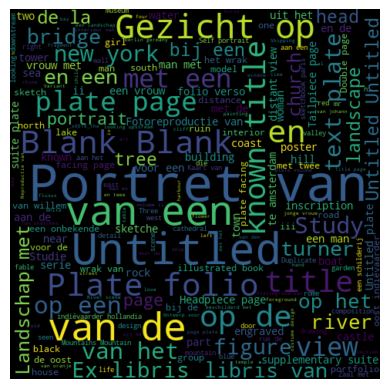

In [209]:
# Frequency distribution for artwork key works

# Moving the artwork column into a separate dataframe

Artwork = pd.DataFrame(df["Artwork"], columns = ['Index','Artwork'])

# First, creating a text list of all the words in column artwork
# and setting these as string
Artwork_text = " ".join(review for review in Artwork.Artwork.astype(str))

# Plotting the information with this wordcloud
wordcloud = WordCloud(width=480, height=480, margin=0).generate(Artwork_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [210]:
# I will replace 'Blank Blank' and 'Untitled' with Not available

#df['Artwork'] = df['Artwork'].replace(['Blank Blank', 'Untitled'], 'Not Available')
df['Artwork'] = df['Artwork'].apply(lambda x: 'Not Available' if isinstance(x, str) and x.strip().lower() in ['blank blank', 'untitled'] else x)


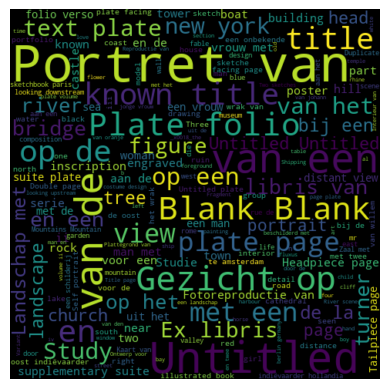

In [211]:
# Check

# Moving the artwork column into a separate dataframe

Artwork = pd.DataFrame(df["Artwork"], columns = ['Index','Artwork'])

# First, creating a text list of all the words in column artwork
# and setting these as string
Artwork_text = " ".join(review for review in Artwork.Artwork.astype(str))

# Plotting the information with this wordcloud
wordcloud = WordCloud(width=480, height=480, margin=0).generate(Artwork_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Text(0, 0.5, 'Museum')

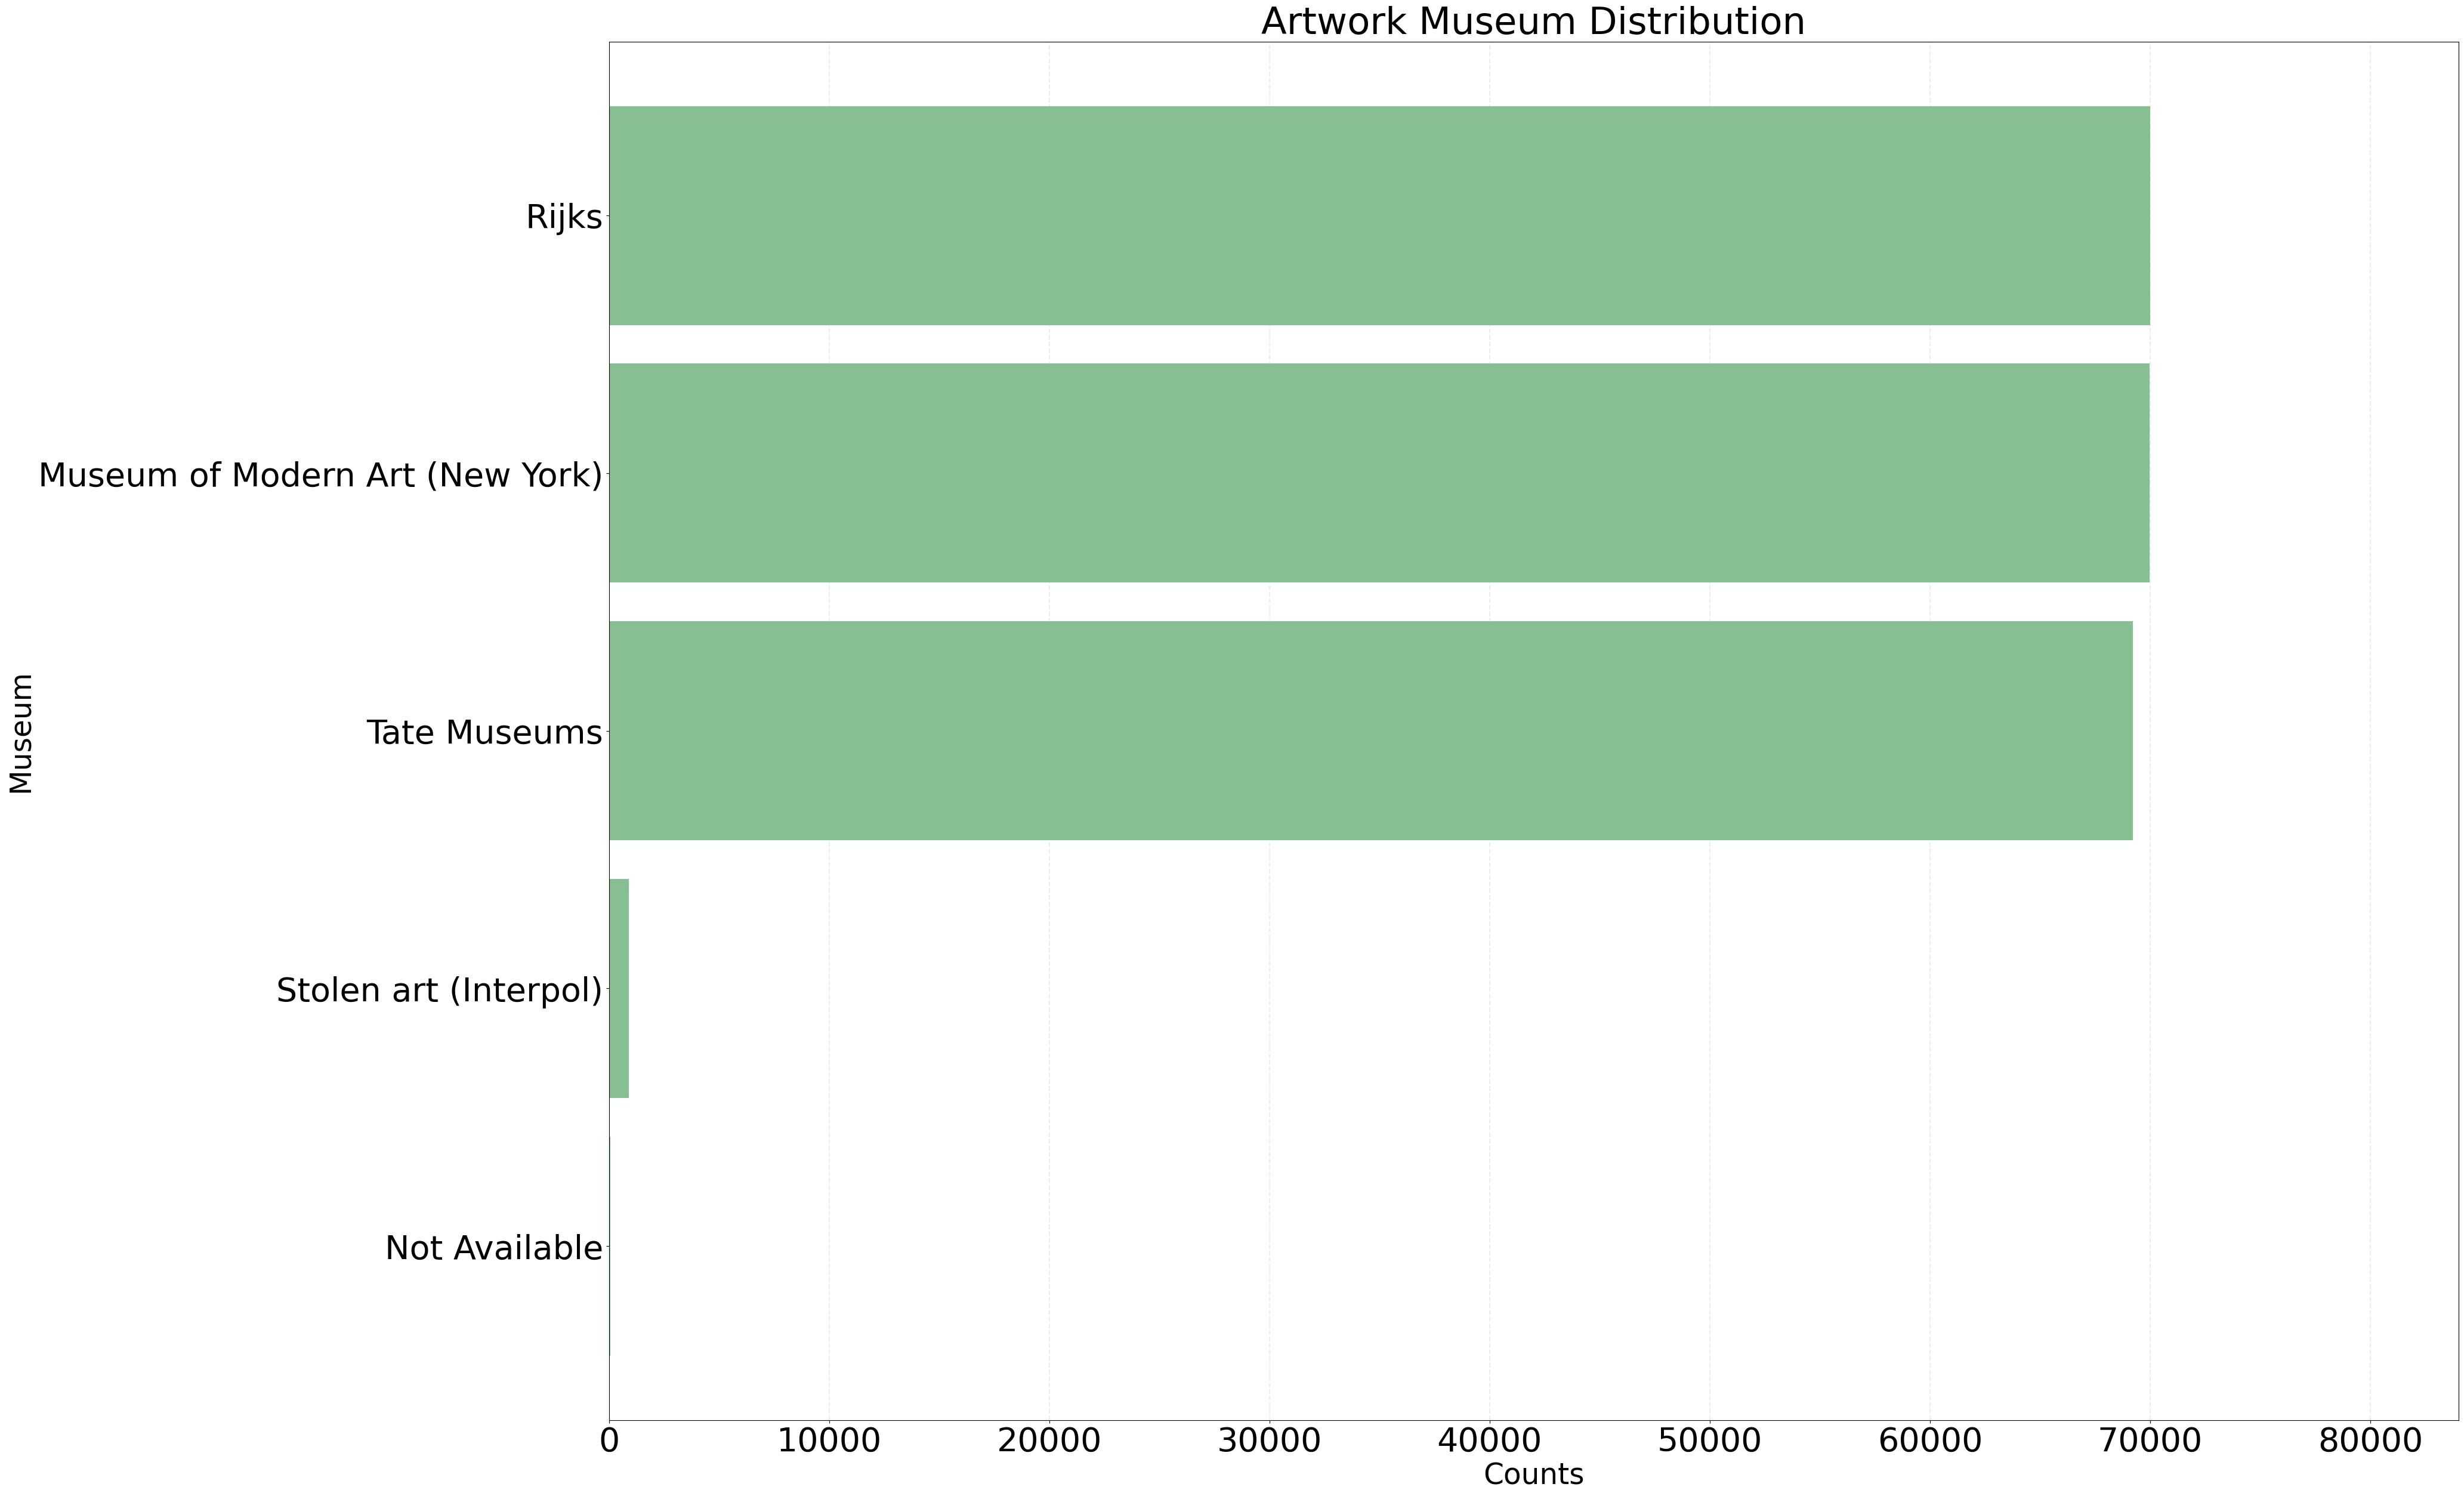

In [212]:
# Frequency distribution for museum

# First, counting the number of artwork for each museum
counts = df['Museum'].value_counts()
counts

# I will be doing my horizontal histogram by importing matplotlib
counts.plot(kind='barh')

# I'll make it nicer with adding colours:
ax = counts.plot(kind='barh', figsize=(40,30),color='#86bf91', zorder=2, width=0.85)

# To make the graph ordered from highest count to lowest
ax.invert_yaxis()

# To make the labels on ticks on the axes bigger and more visible
plt.xticks(size = 40)
plt.yticks(size = 40)

# To draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='lightgrey', zorder=1)

# Setting titles and making my labels bigger and more readible:
ax.set_title('Artwork Museum Distribution', size = 45)
ax.set_xlabel('Counts',  size = 35)
ax.set_ylabel('Museum',  size = 35)

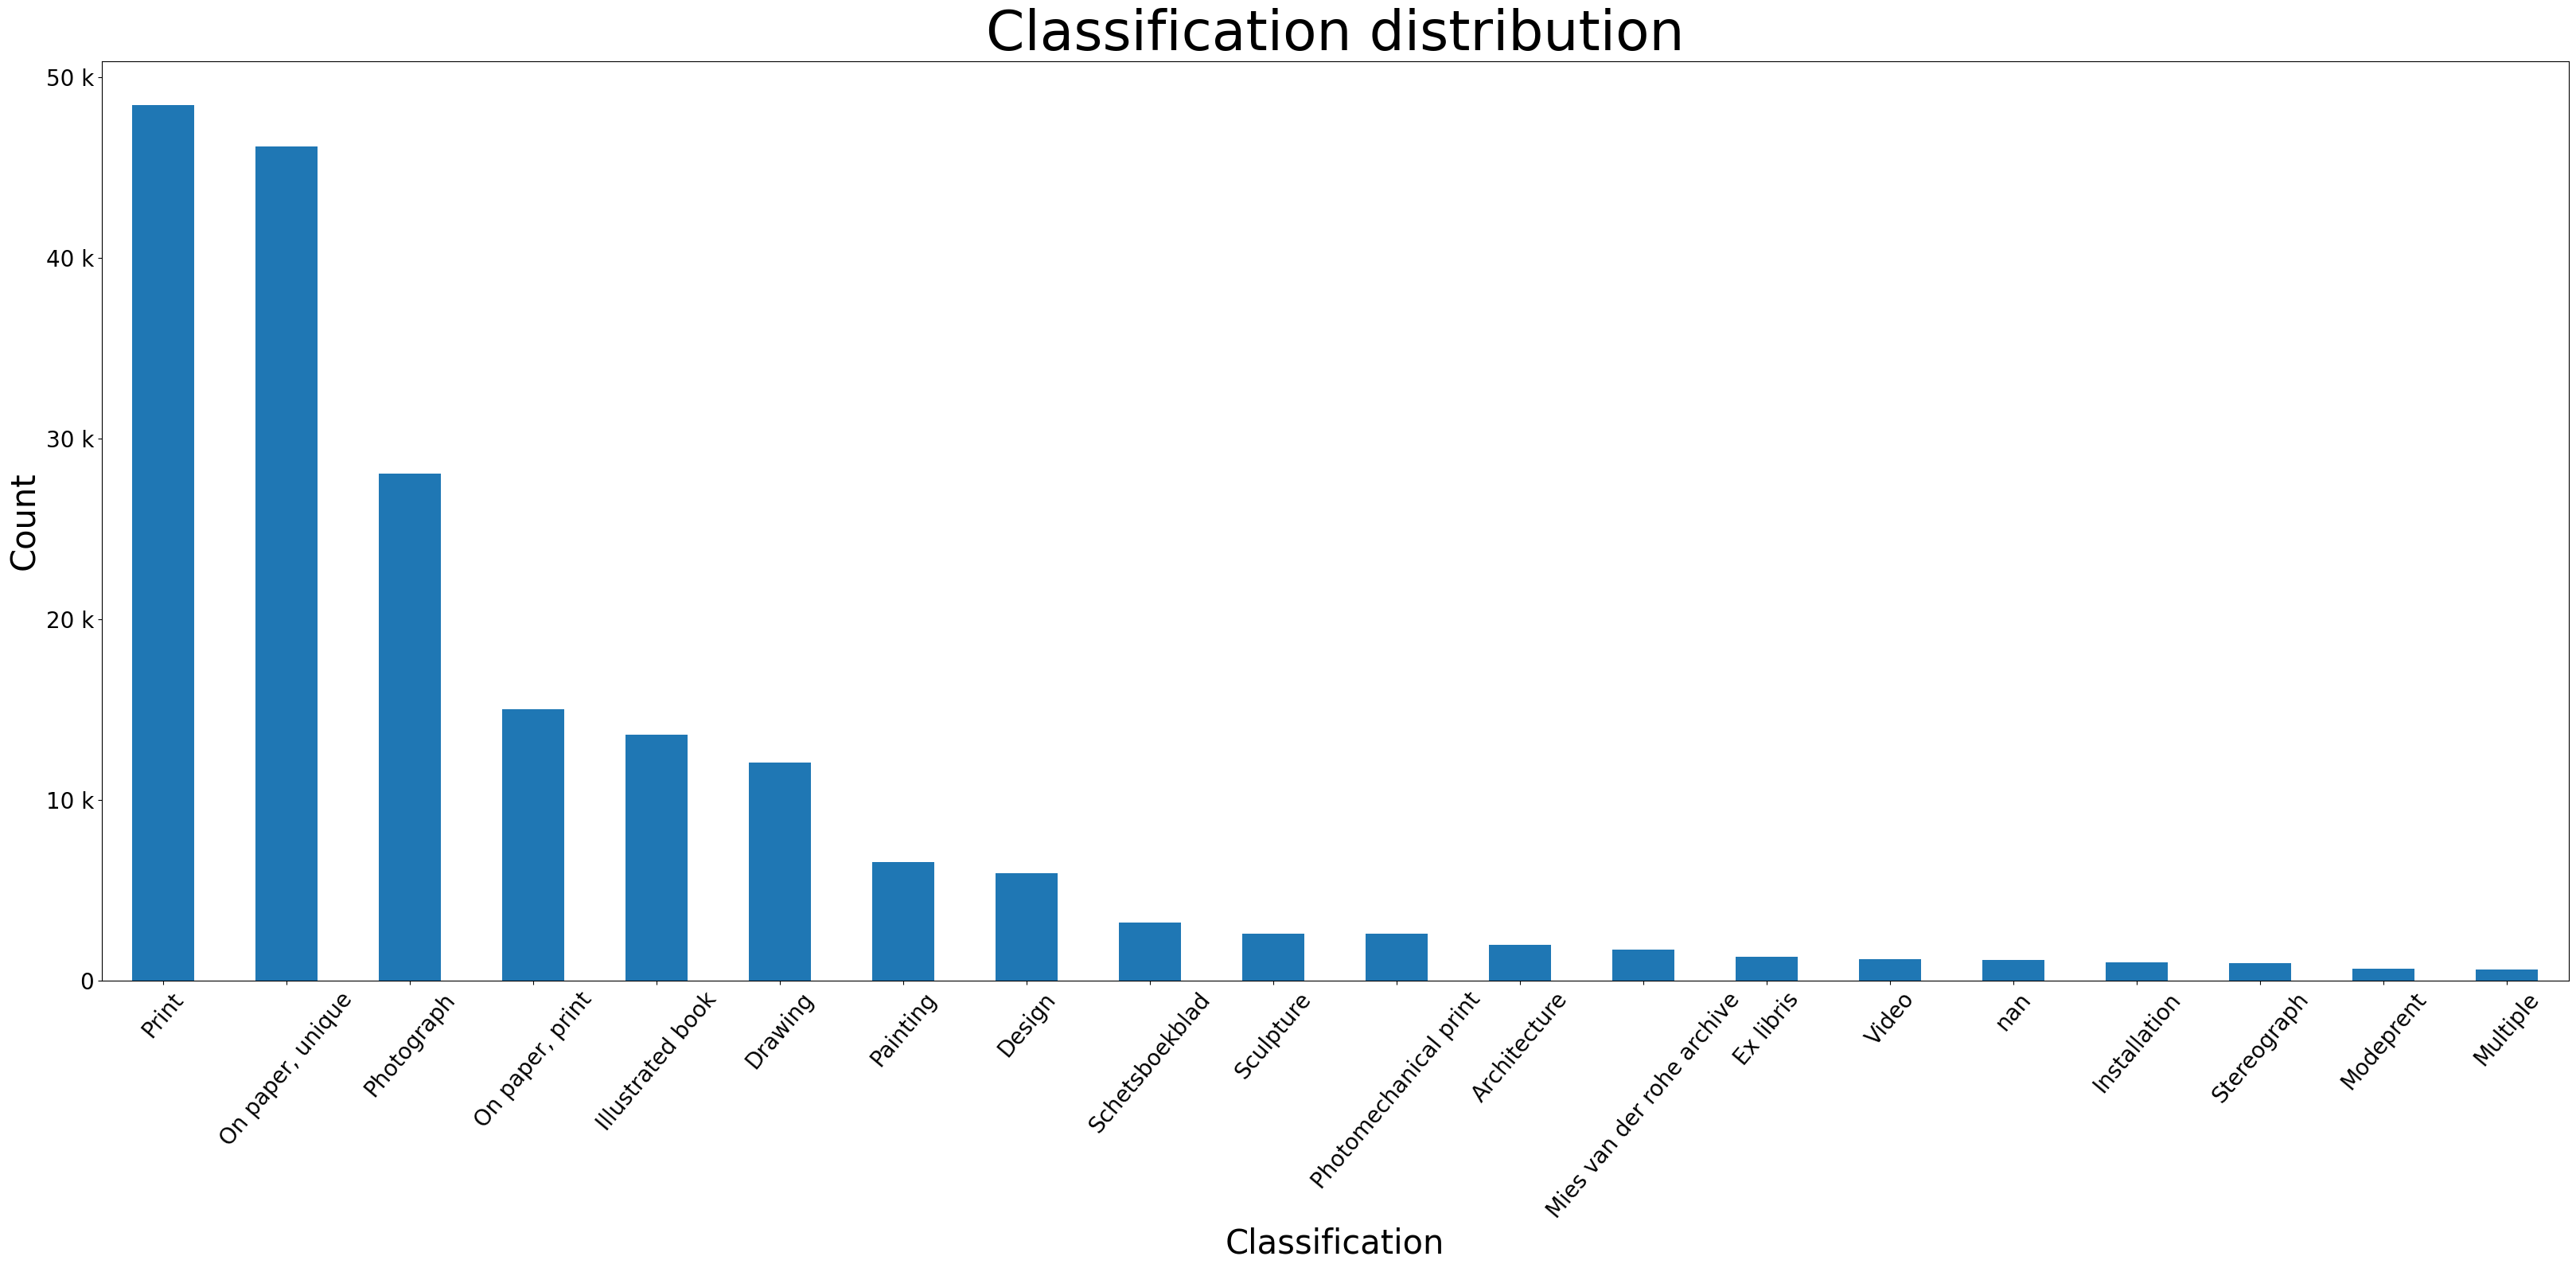

In [213]:
# Frequency distribution for classification column

# First, counting the number of artwork by classification, limiting the results to the first 20
counts = df['Classification'].value_counts()[:20]

# Creating the histogram. Adding rot and fotsize to make the labels on the x axes more visible
ax = counts.plot.bar(rot=0, fontsize=4, figsize=(40,15))

# Setting titles and making my labels bigger and more readible:
ax.set_title('Classification distribution', size = 50)
ax.set_xlabel('Classification',  size = 30)
ax.set_ylabel('Count',  size = 30)

#Format counts as integers only
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))

# To make the ticks on the axes bigger and more visible and setting colours. Rotating ticks on x axe also
plt.xticks(rotation=50, horizontalalignment="center", size=20)
plt.yticks(size=20)
ax.set_facecolor("white")
plt.show()


In [214]:
# I will replace 'nan' and 'Untitled' with Not available

df['Classification'] = df['Classification'].replace(['nan'], 'Not Available')

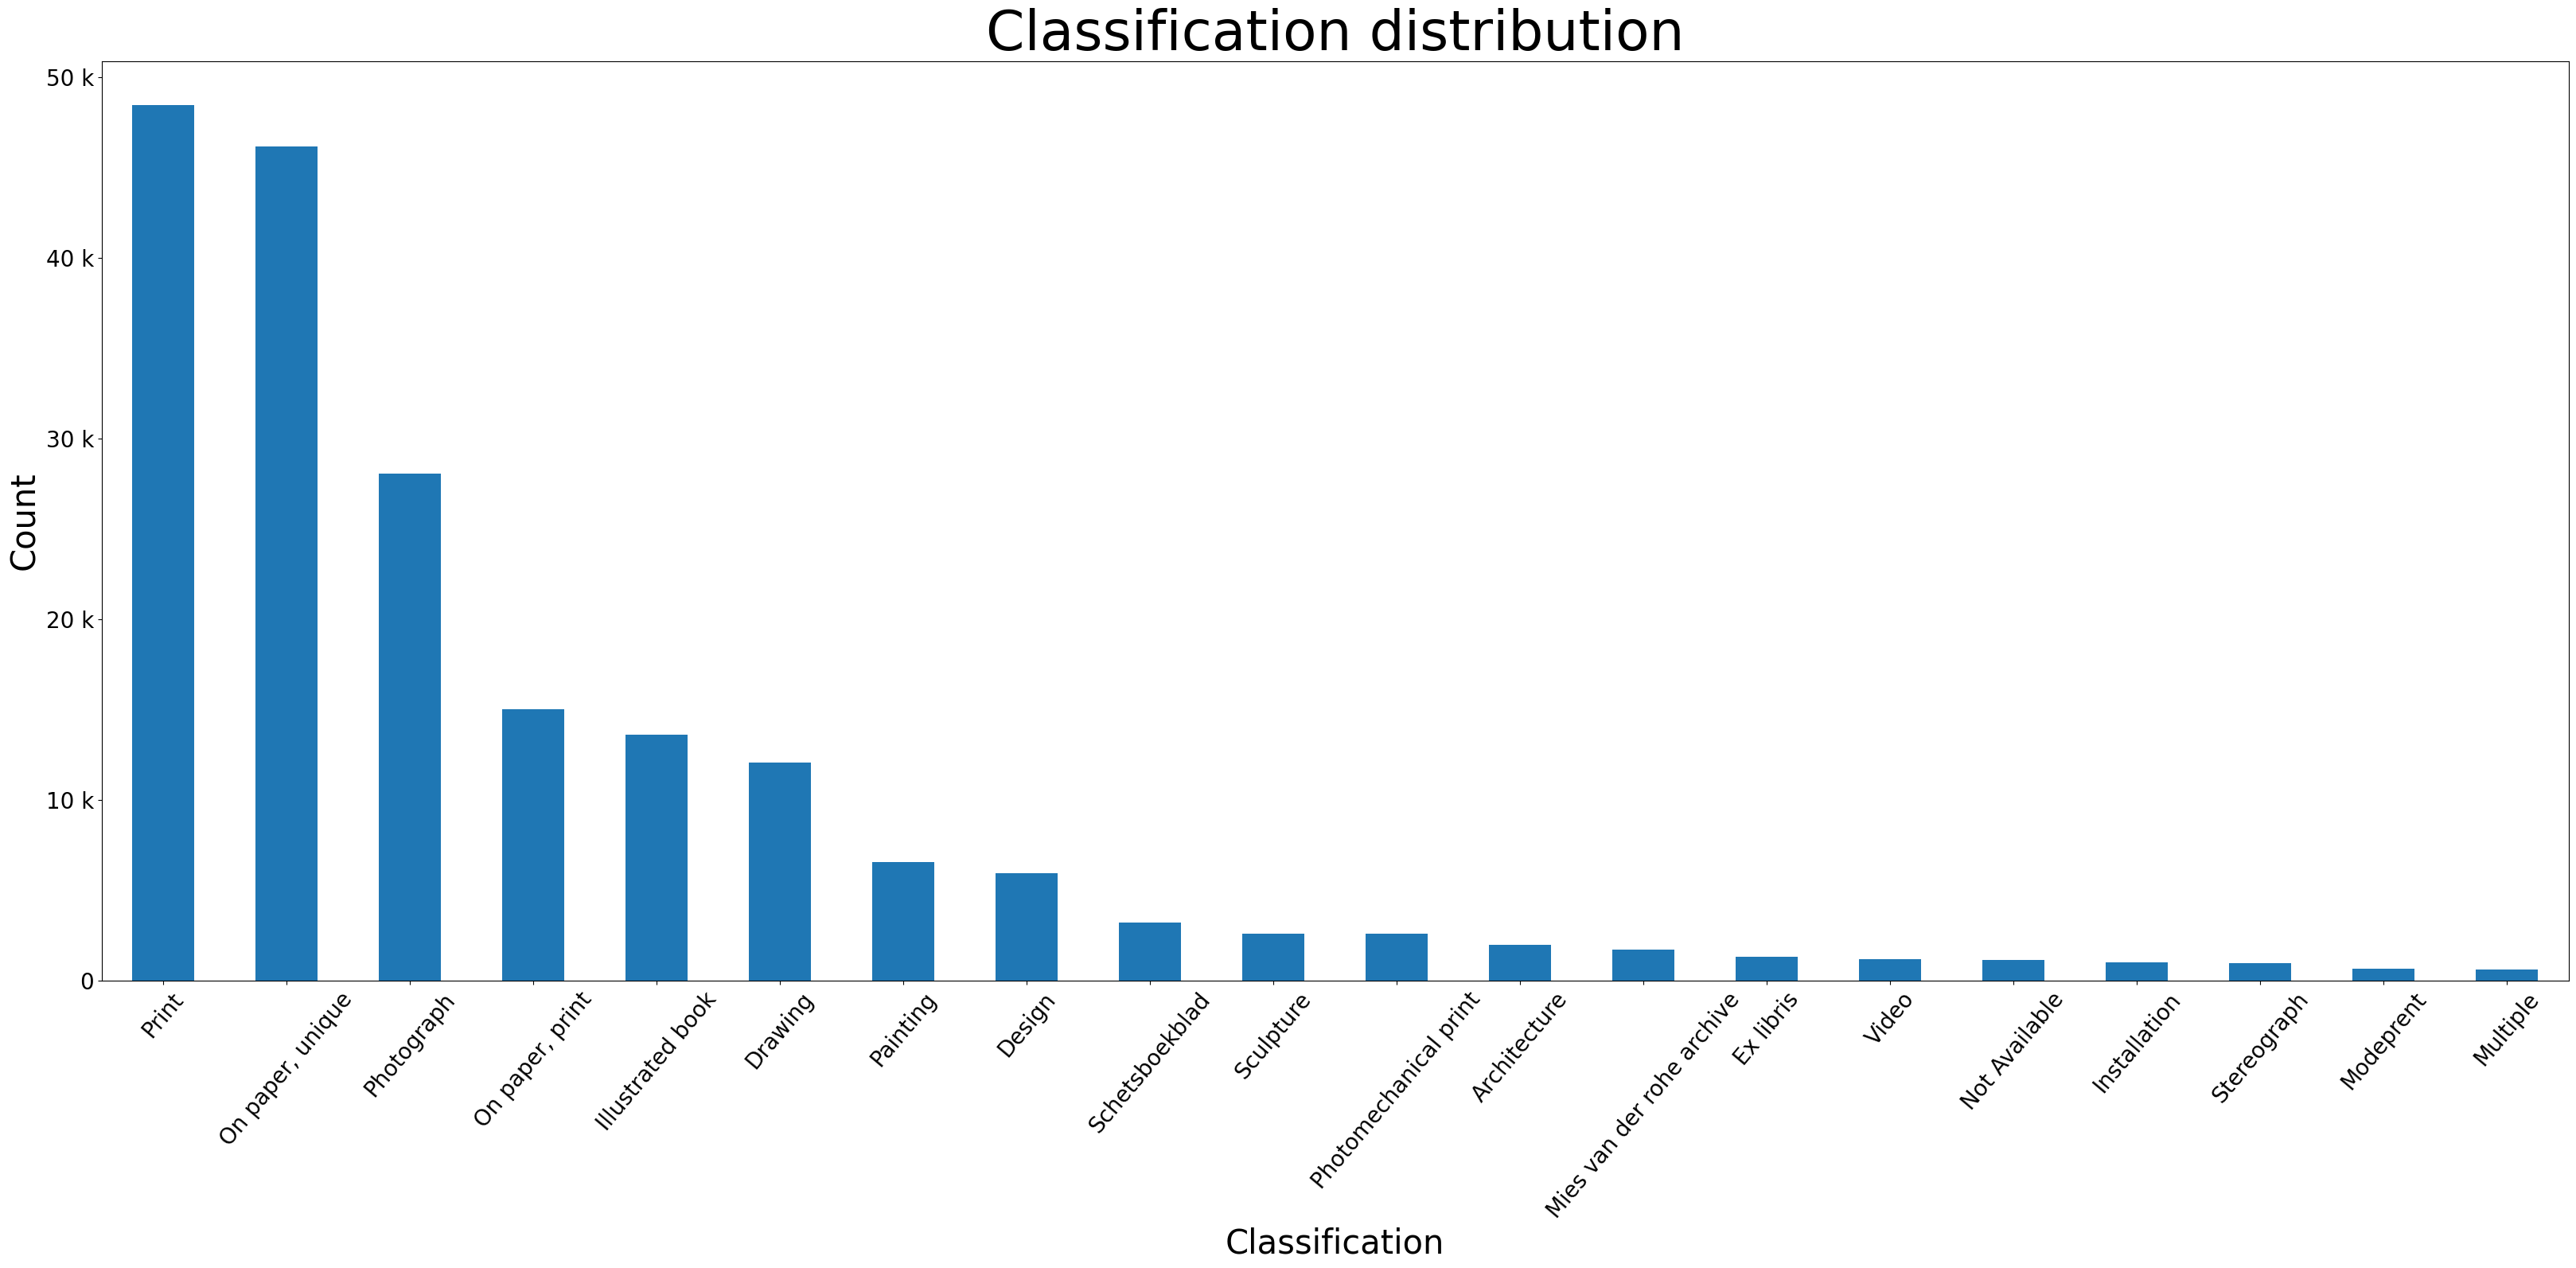

In [215]:
# Check

# First, counting the number of artwork by classification, limiting the results to the first 20
counts = df['Classification'].value_counts()[:20]

# Creating the histogram. Adding rot and fotsize to make the labels on the x axes more visible
ax = counts.plot.bar(rot=0, fontsize=4, figsize=(40,15))

# Setting titles and making my labels bigger and more readible:
ax.set_title('Classification distribution', size = 50)
ax.set_xlabel('Classification',  size = 30)
ax.set_ylabel('Count',  size = 30)

#Format counts as integers only
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))

# To make the ticks on the axes bigger and more visible and setting colours. Rotating ticks on x axe also
plt.xticks(rotation=50, horizontalalignment="center", size=20)
plt.yticks(size=20)
ax.set_facecolor("white")
plt.show()


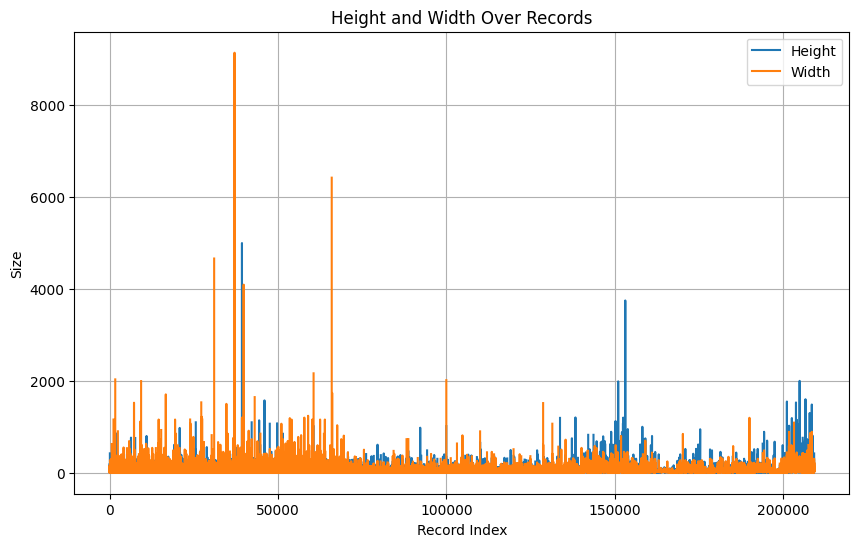

In [216]:
# Line grapgh for height and width

# Setting types again

df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')


# Line graph fo height and width

# Plotting Height and Width
plt.figure(figsize=(10,6))

df_reset = df.reset_index(drop=True) # Reset index and drop old one

plt.plot(df_reset.index, df_reset['Height'], label='Height')
plt.plot(df_reset.index, df_reset['Width'], label='Width')

plt.xlabel('Record Index')
plt.ylabel('Size')
plt.title('Height and Width Over Records')
plt.legend()
plt.grid(True)
plt.show()






Text(0, 0.5, 'Medium')

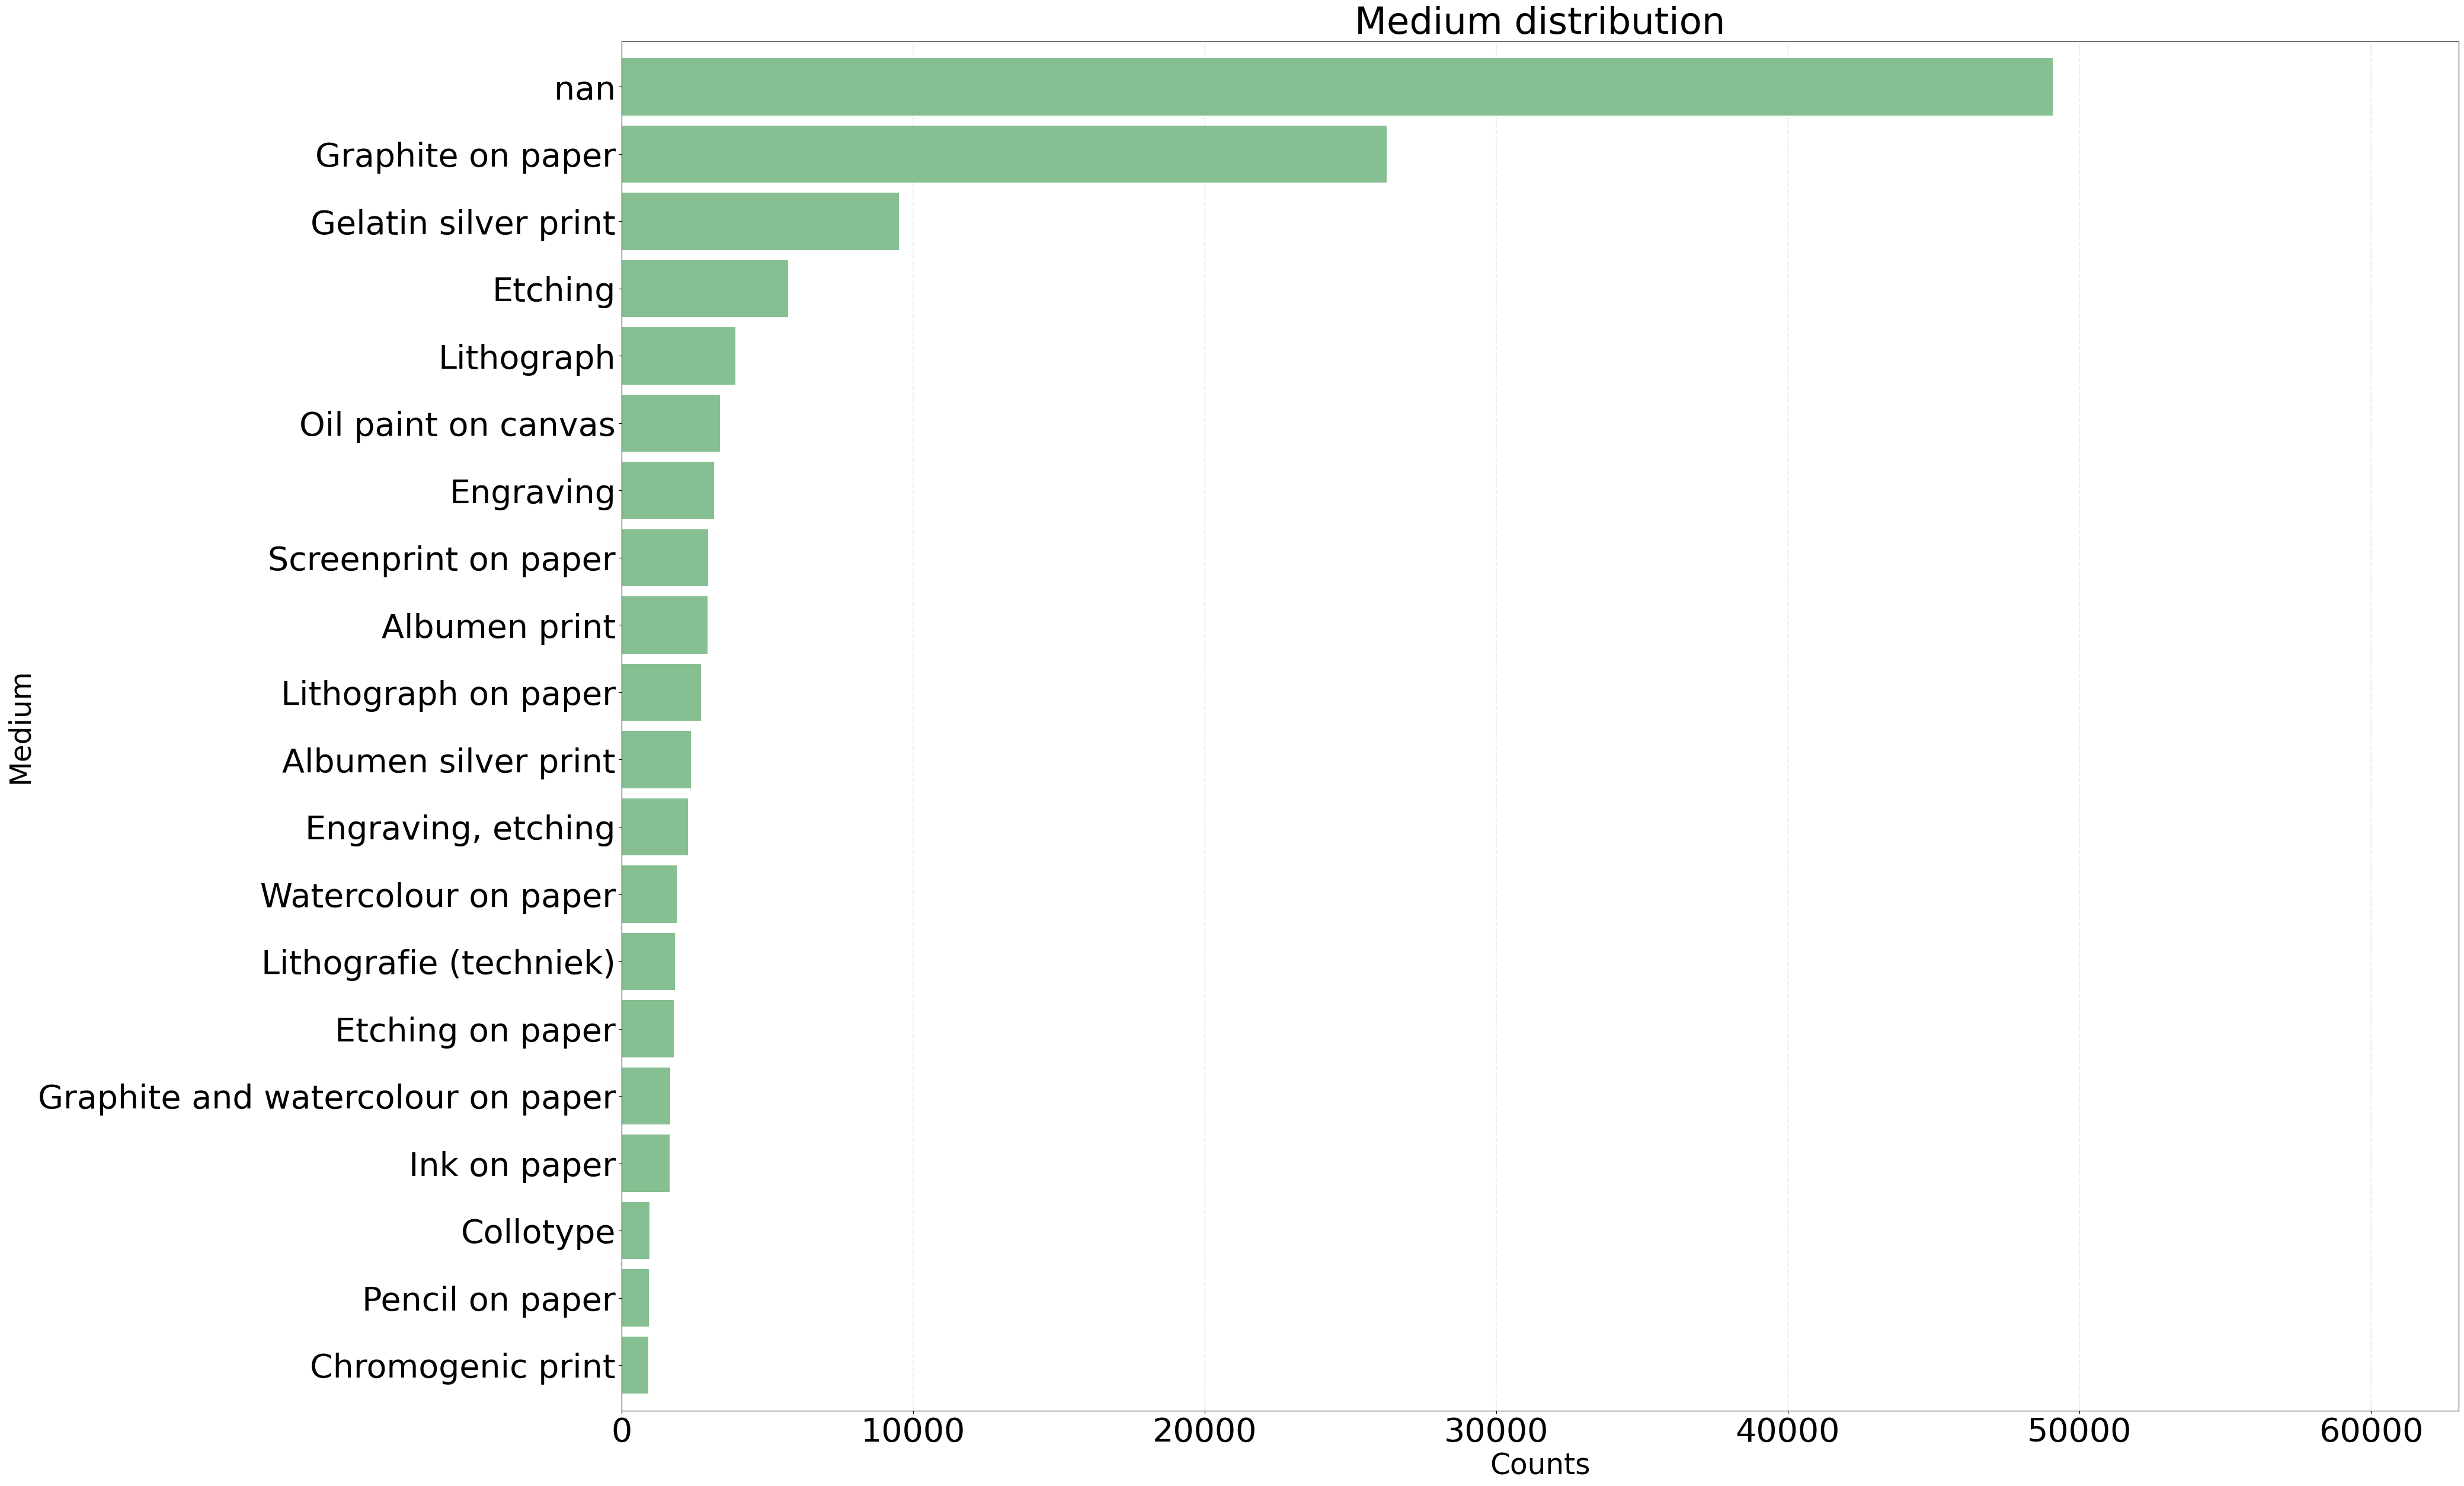

In [217]:
# bar graph for column medium

# First, counting the number of artwork for each museum, for the first 20
counts = df['Medium'].value_counts()[:20]
counts

# I will be doing my horizontal histogram by importing matplotlib
counts.plot(kind='barh')

# I'll make it nicer with adding colours:
ax = counts.plot(kind='barh', figsize=(40,30),color='#86bf91', zorder=2, width=0.85)

# To make the graph ordered from highest count to lowest
ax.invert_yaxis()

# To make the labels on ticks on the axes bigger and more visible
plt.xticks(size = 40)
plt.yticks(size = 40)

# To draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='lightgrey', zorder=1)

# Setting titles and making my labels bigger and more readible:
ax.set_title('Medium distribution', size = 45)
ax.set_xlabel('Counts',  size = 35)
ax.set_ylabel('Medium',  size = 35)

In [218]:
# I will replace 'nan' with Not available

df['Medium'] = df['Medium'].replace(['nan'], 'Not Available')

Text(0, 0.5, 'Medium')

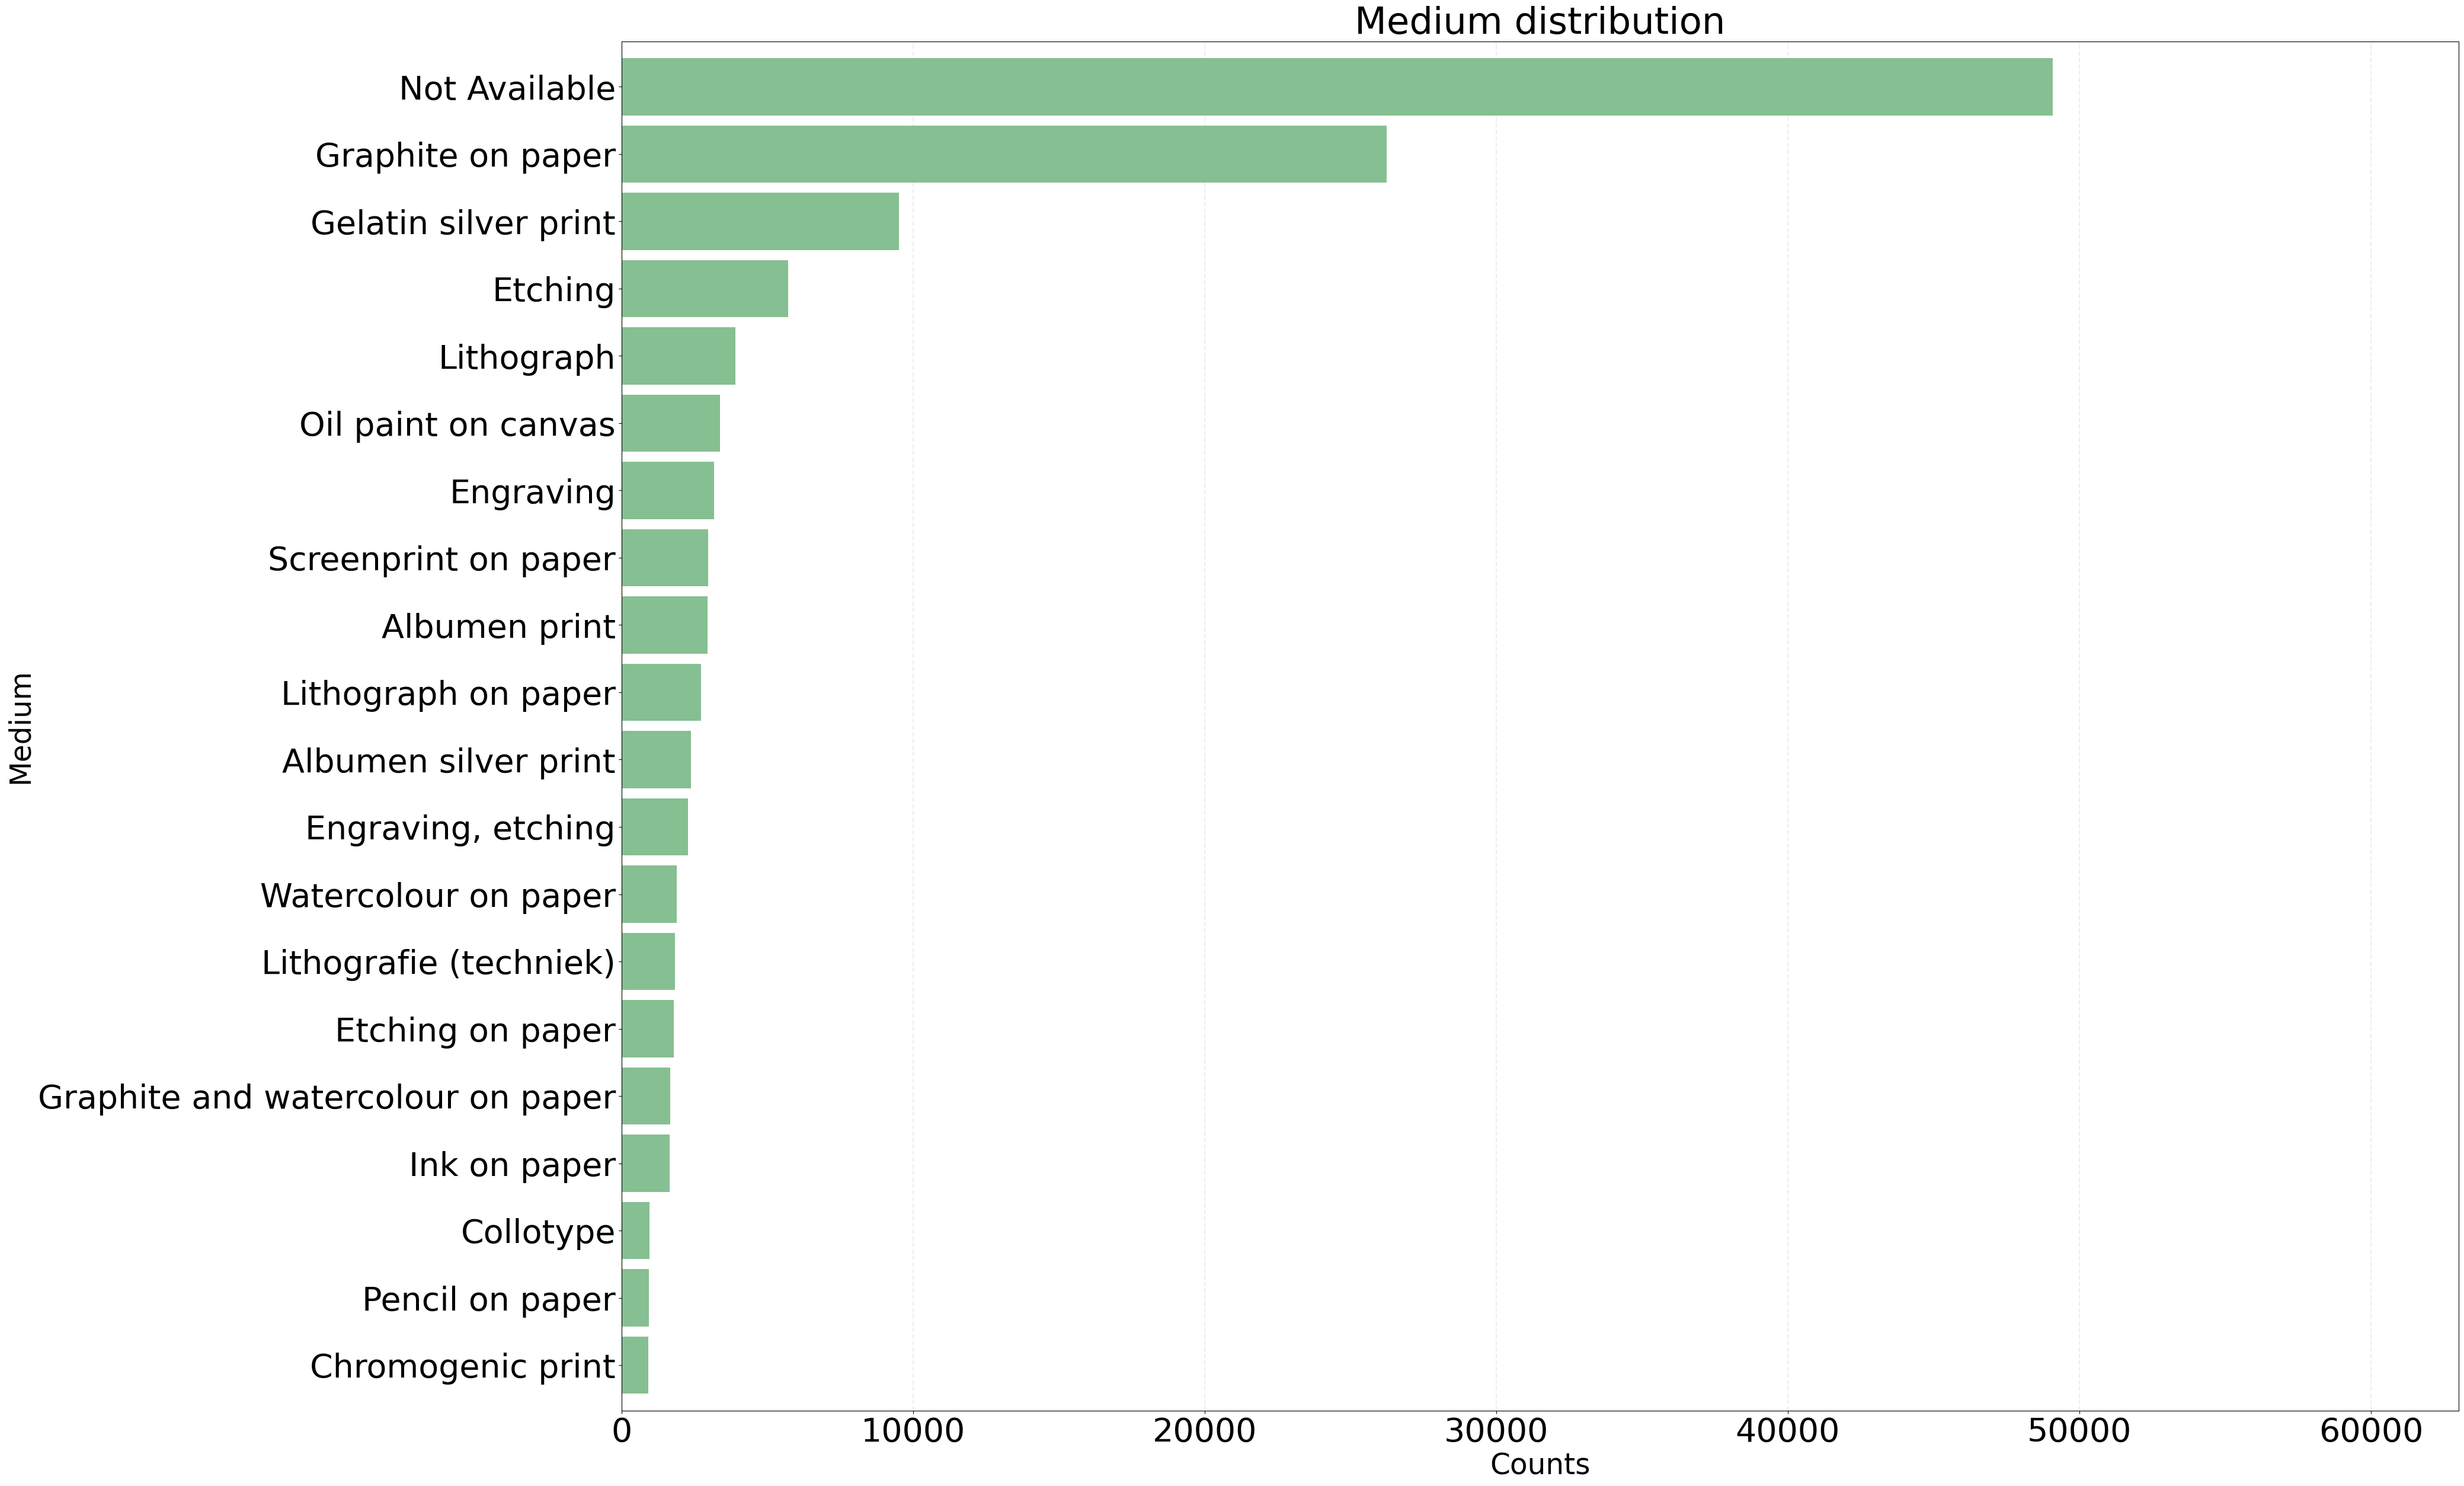

In [219]:
# Check

# First, counting the number of artwork for each museum, for the first 20
counts = df['Medium'].value_counts()[:20]
counts

# I will be doing my horizontal histogram by importing matplotlib
counts.plot(kind='barh')

# I'll make it nicer with adding colours:
ax = counts.plot(kind='barh', figsize=(40,30),color='#86bf91', zorder=2, width=0.85)

# To make the graph ordered from highest count to lowest
ax.invert_yaxis()

# To make the labels on ticks on the axes bigger and more visible
plt.xticks(size = 40)
plt.yticks(size = 40)

# To draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='lightgrey', zorder=1)

# Setting titles and making my labels bigger and more readible:
ax.set_title('Medium distribution', size = 45)
ax.set_xlabel('Counts',  size = 35)
ax.set_ylabel('Medium',  size = 35)


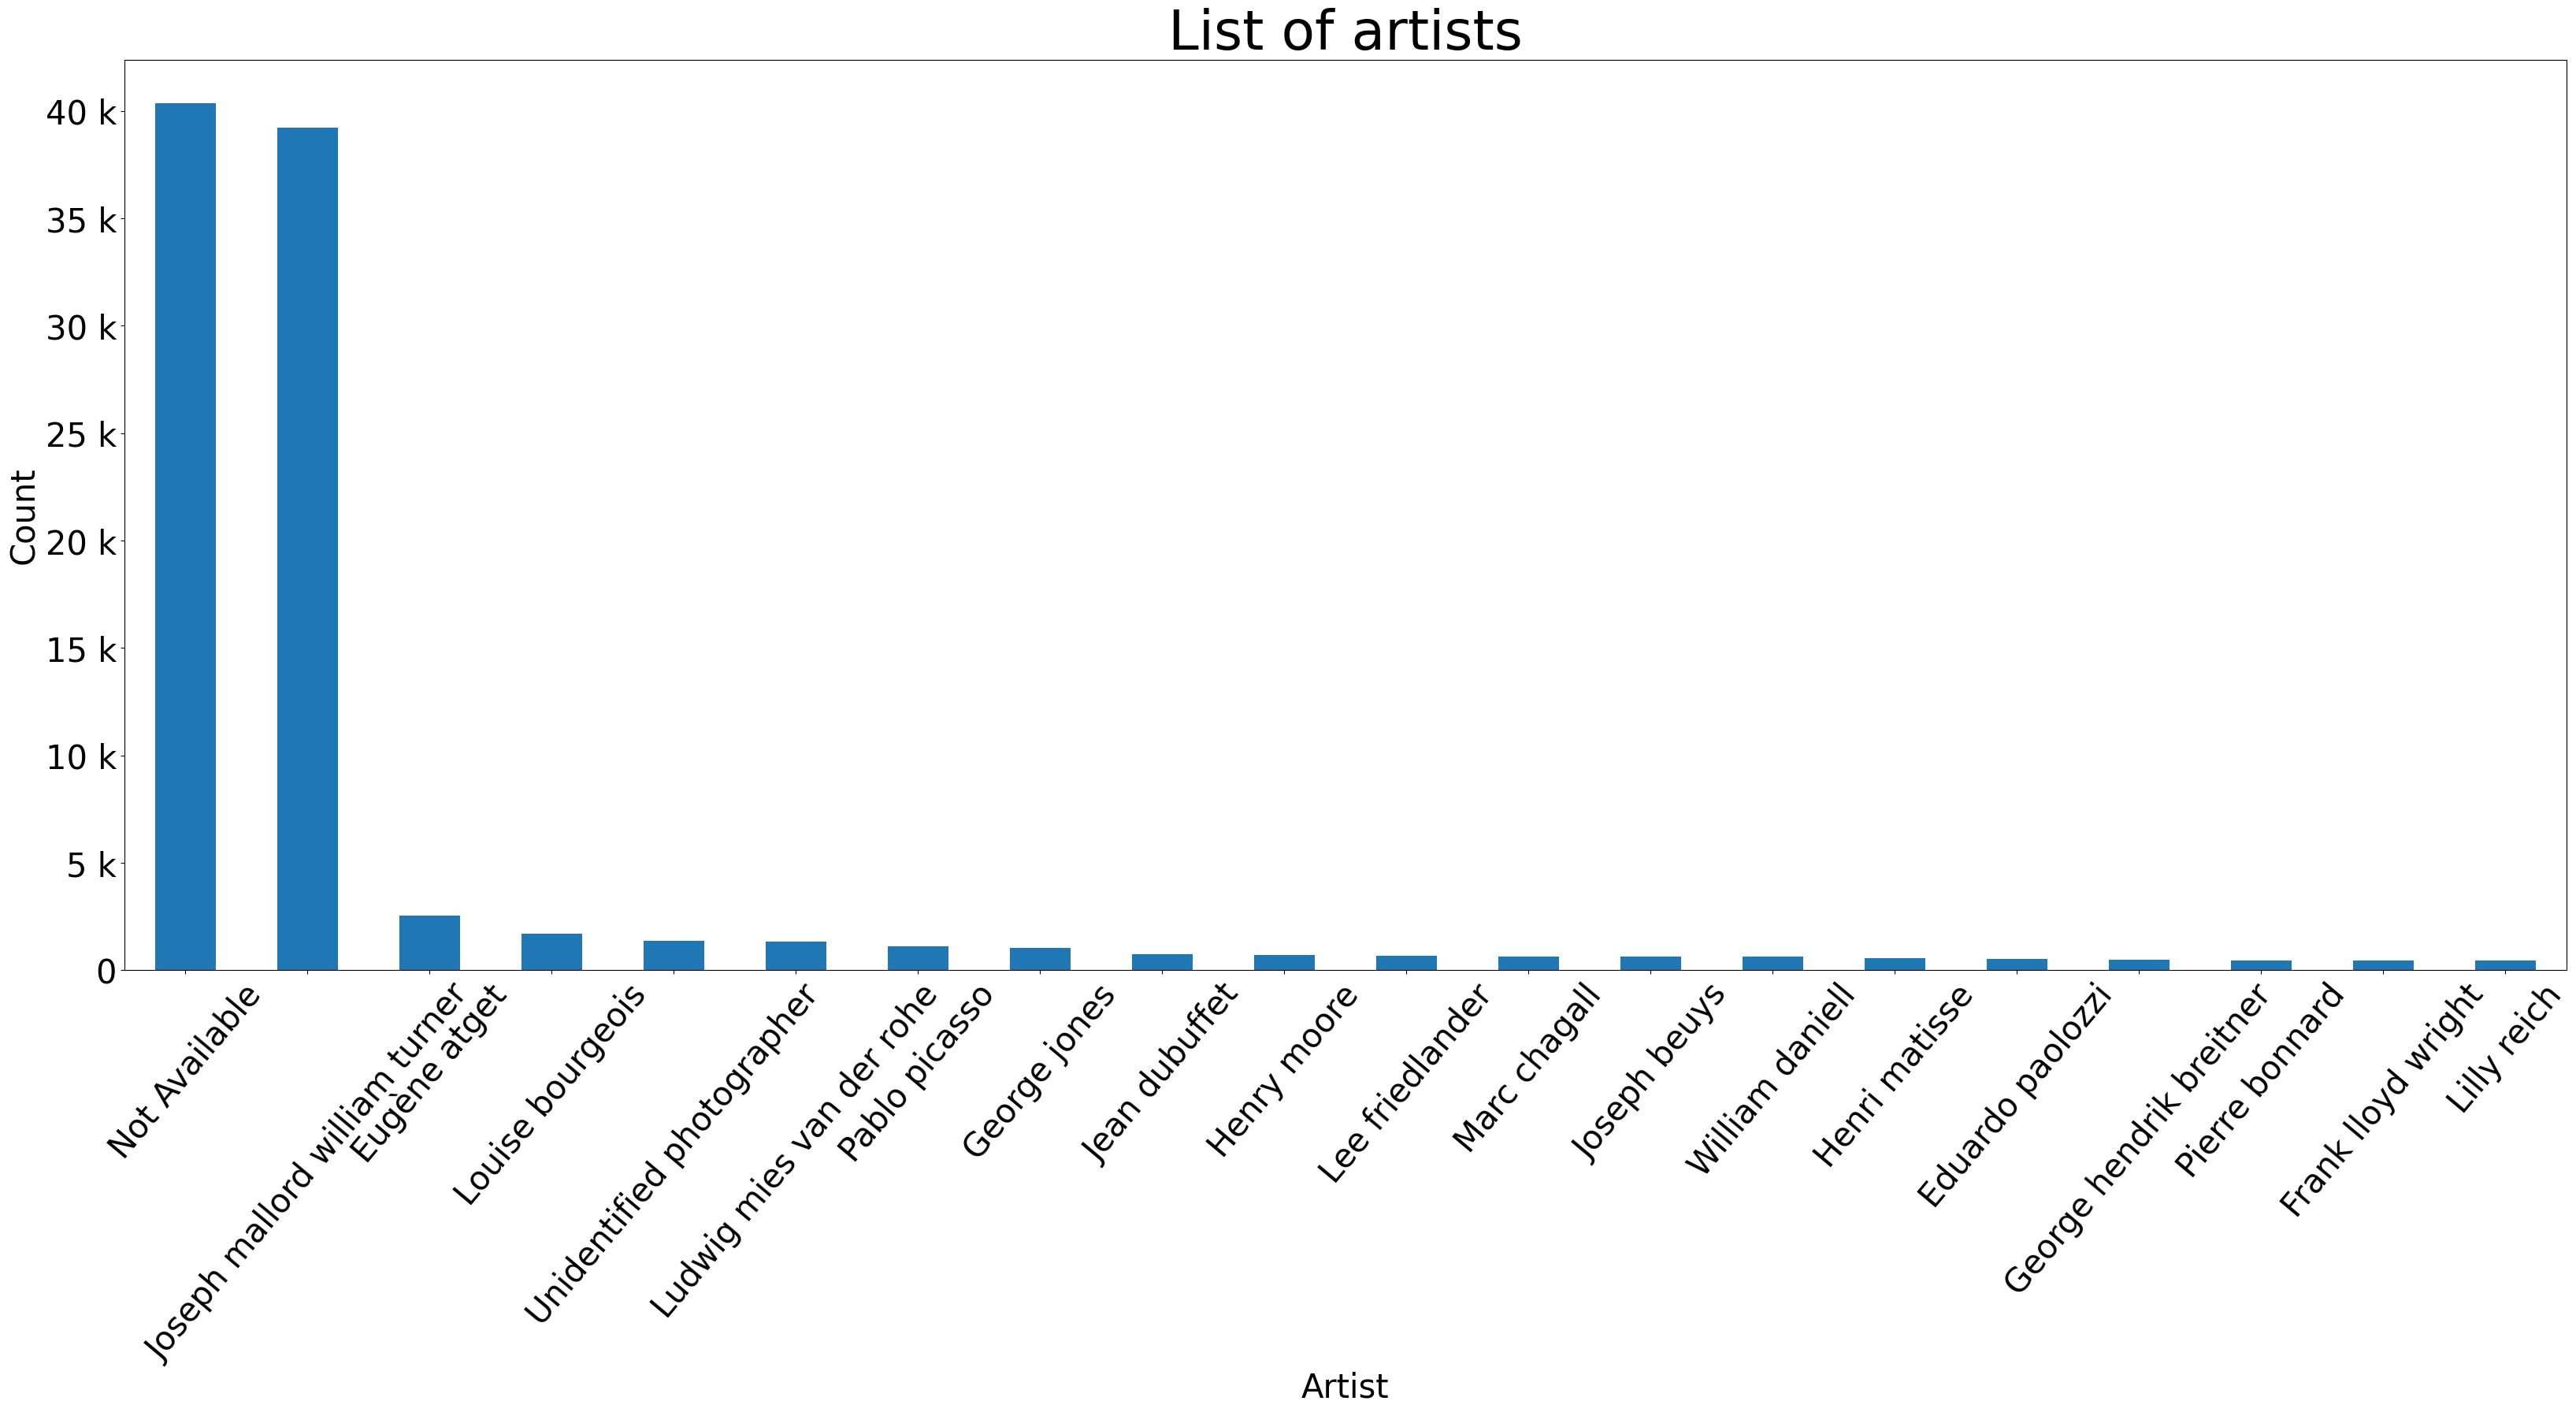

In [220]:
# Frequency distribution for artist

# Frequency distribution for classification column

# First, counting the number of artwork by classification, limiting the results to the first 20
counts = df['Artists'].value_counts()[:20]

# Creating the histogram. Adding rot and fotsize to make the labels on the x axes more visible
ax = counts.plot.bar(rot=0, fontsize=4, figsize=(40,15))

# Setting titles and making my labels bigger and more readible:
ax.set_title('List of artists', size = 50)
ax.set_xlabel('Artist',  size = 30)
ax.set_ylabel('Count',  size = 30)

#Format counts as integers only
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))

# To make the ticks on the axes bigger and more visible and setting colours. Rotating ticks on x axe also
plt.xticks(rotation=50, horizontalalignment="center", size=30)
plt.yticks(size=30)
ax.set_facecolor("white")
plt.show()


In [222]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [221]:
# Saving the DataFrame as a CSV file (if neede)

#Artworks_Cleaned_Csv = df.to_csv('Artworks_Cleaned.csv', encoding='utf-8')
#Artworks_Cleaned_Csv